In [52]:
import pandas as pd
import numpy as np

matches_df = pd.read_csv('matches.csv')
runs = pd.read_csv("zips/825771/off_ball_runs.csv")
pass_opts = pd.read_csv("zips/825771/passing_options.csv")
poss = pd.read_csv("zips/825771/player_possessions.csv")
tracking = pd.read_csv("zips/825771/tracking.csv")
# runs = pd.read_csv("zips/sporting-1227049/off_ball_runs.csv")
# pass_opts = pd.read_csv("zips/sporting-1227049/passing_options.csv")
# poss = pd.read_csv("zips/sporting-1227049/player_possessions.csv")
# tracking = pd.read_csv("zips/sporting-1227049/tracking.csv")


/var/folders/mk/np6rblqn5jzdcb48rl2zt3bm0000gn/T/ipykernel_43775/3233729457.py:8: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  tracking = pd.read_csv("zips/825771/tracking.csv")


### Plot a frame

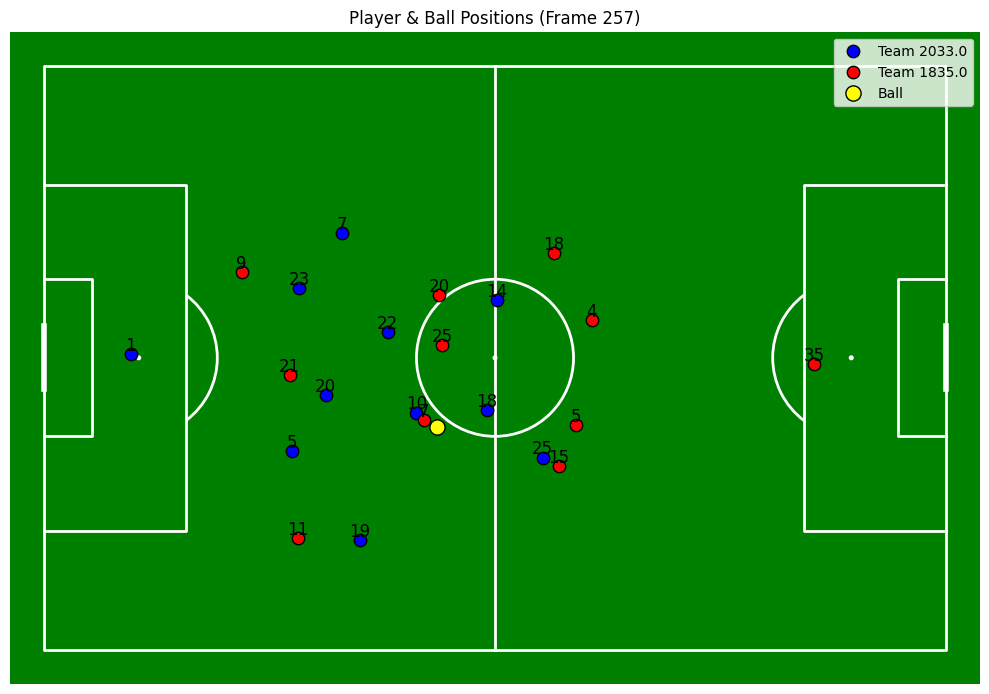

In [ ]:
import matplotlib.pyplot as plt

def plot_frame_positions(tracking, frame_id, annotate=True):
    frame_data = tracking[tracking["frame_id"] == frame_id]

    if frame_data.empty:
        print(f"No data found for frame_id={frame_id}")
        return

    # Pitch dimensions
    x_min, x_max = -52.5, 52.5
    y_min, y_max = -34, 34

    plt.figure(figsize=(10, 7))

    plt.plot([x_min, x_max, x_max, x_min, x_min], 
             [y_min, y_min, y_max, y_max, y_min], color="black")

    ball_data = frame_data[frame_data["player_id"] == "ball"]
    player_data = frame_data[frame_data["player_id"] != "ball"]

    teams = player_data["team_id"].unique()

    if len(teams) >= 2:
        team1, team2 = teams[:2]
    else:
        print("Warning: less than 2 teams detected")
        team1, team2 = teams[0], None


    team1_data = player_data[player_data["team_id"] == team1]
    team1_data = team1_data[team1_data["x"].notna()]
    plt.scatter(team1_data["x"], team1_data["y"], 
                c="blue", label=f"Team {team1}", s=80, edgecolor="black")
    if annotate:
        for _, row in team1_data.iterrows():
            label = row["jersey_number"] if "jersey_number" in row else row["player_id"]
            plt.text(row["x"], row["y"]+0.8, str(label), ha="center", fontsize=8, color="blue")

    if team2 is not None:
        team2_data = player_data[player_data["team_id"] == team2]
        team2_data = team2_data[team2_data["x"].notna()]
        plt.scatter(team2_data["x"], team2_data["y"], 
                    c="red", label=f"Team {team2}", s=80, edgecolor="black")
        if annotate:
            for _, row in team2_data.iterrows():
                label = row["jersey_number"] if "jersey_number" in row else row["player_id"]
                plt.text(row["x"], row["y"]+0.8, str(label), ha="center", fontsize=8, color="red")

    if not ball_data.empty:
        plt.scatter(ball_data["x"], ball_data["y"], 
                    c="yellow", marker="o", s=120, edgecolor="black", label="Ball")

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.gca().set_aspect("equal", adjustable="box")
    plt.title(f"Player & Ball Positions (Frame {frame_id})")
    plt.xlabel("X (Pitch length in meters)")
    plt.ylabel("Y (Pitch width in meters)")
    plt.legend()
    plt.show()

frames = [1192, 1266, 2653, 3562, 3908, 8970, 10479, 11401, 12498, 14074, 16401, 17133, 22007, 22260, 22296, 24671, 29383, 29969, 33653, 33760, 37179, 40743, 44991, 46303, 48044, 48183, 49656, 49824, 52608, 55163, 58380, 61384, 61450, 63805, 64402]
frames = [14074]

# for frame in frames:
#     print(f"Frame:{frame}\n")
#     plot_frame_positions(tracking, frame, annotate=True)
# plot_frame_positions(tracking, 445, annotate=True)

from mplsoccer import Pitch
import matplotlib.pyplot as plt

def plot_frame_positions_mplsoccer(tracking, frame_id, team_mapping=None, annotate=True):
    frame_data = tracking[tracking["frame_id"] == frame_id]

    if frame_data.empty:
        print(f"No data found for frame_id={frame_id}")
        return

    # Pitch dimensions in meters (standard: 105x68)
    pitch = Pitch(pitch_type='custom', 
                  pitch_length=105, pitch_width=68, pitch_color='green',
                  line_color='white')
    fig, ax = pitch.draw(figsize=(10, 7))

    # Ball vs players
    ball_data = frame_data[frame_data["player_id"] == "ball"]
    player_data = frame_data[frame_data["player_id"] != "ball"]

    teams = player_data["team_id"].unique()
    if len(teams) >= 2:
        team1, team2 = teams[:2]
    else:
        print("Warning: less than 2 teams detected")
        team1, team2 = teams[0], None

    # Use team_mapping for legend labels if available
    t1_label = team_mapping.get(team1, f"Team {team1}") if team_mapping else f"Team {team1}"
    t2_label = team_mapping.get(team2, f"Team {team2}") if team_mapping else f"Team {team2}"

    # Plot team 1
    team1_data = player_data[player_data["team_id"] == team1].dropna(subset=["x", "y"])
    pitch.scatter(team1_data["x"] + 52.5, team1_data["y"] + 34,
                  c="blue", edgecolors="black", s=80, ax=ax, label=t1_label)
    if annotate:
        for _, row in team1_data.iterrows():
            label = int(row["jersey_number"]) if "jersey_number" in row else row["player_id"]
            pitch.annotate(str(label), (row["x"] + 52.5, row["y"] + 34),
                           ax=ax, ha="center", va="bottom", fontsize=12, color="black")

    # Plot team 2
    if team2 is not None:
        team2_data = player_data[player_data["team_id"] == team2].dropna(subset=["x", "y"])
        pitch.scatter(team2_data["x"] + 52.5, team2_data["y"] + 34,
                      c="red", edgecolors="black", s=80, ax=ax, label=t2_label)
        if annotate:
            for _, row in team2_data.iterrows():
                label = int(row["jersey_number"]) if "jersey_number" in row else row["player_id"]
                pitch.annotate(str(label), (row["x"] + 52.5, row["y"] + 34),
                               ax=ax, ha="center", va="bottom", fontsize=12, color="black")

    # Plot ball
    if not ball_data.empty:
        pitch.scatter(ball_data["x"] + 52.5, ball_data["y"] + 34,
                      c="yellow", edgecolors="black", s=120, ax=ax, label="Ball", marker="o")

    ax.set_title(f"Player & Ball Positions (Frame {frame_id})")
    ax.legend()
    plt.show()

plot_frame_positions_mplsoccer(tracking, 4920)



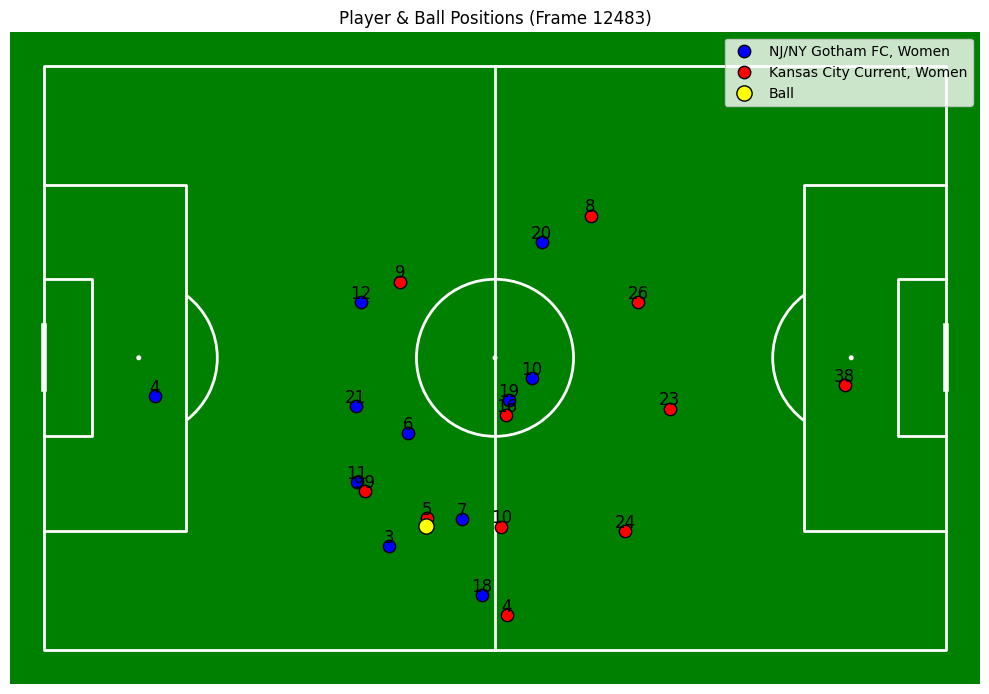

In [59]:
matches_df = pd.read_csv('matches.csv')
team_mapping = {}

for _, row in matches_df.iterrows():
    team_mapping[row['home_team_id']] = row['home_team_name']
    team_mapping[row['away_team_id']] = row['away_team_name']
plot_frame_positions_mplsoccer(tracking, 12483, team_mapping)
# plot_frame_positions_mplsoccer(tracking, 6091, team_mapping)

### Back Line counting Algorithms

Comparing line-based methods for Frame 14074:
------------------------------------------------------------


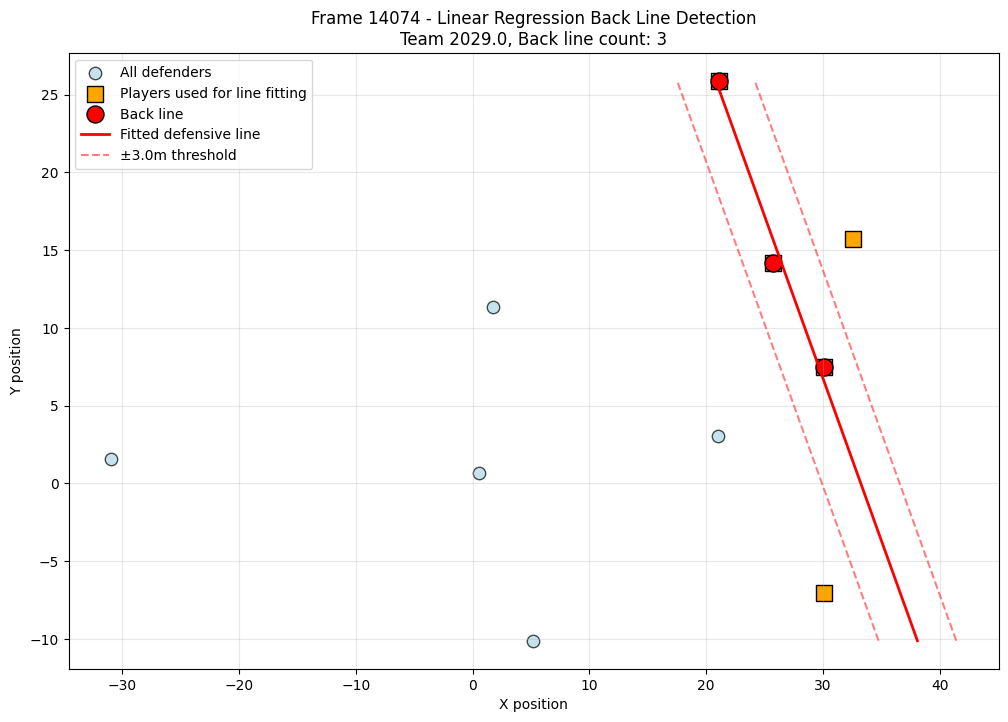

Linear Regression:     3 defenders


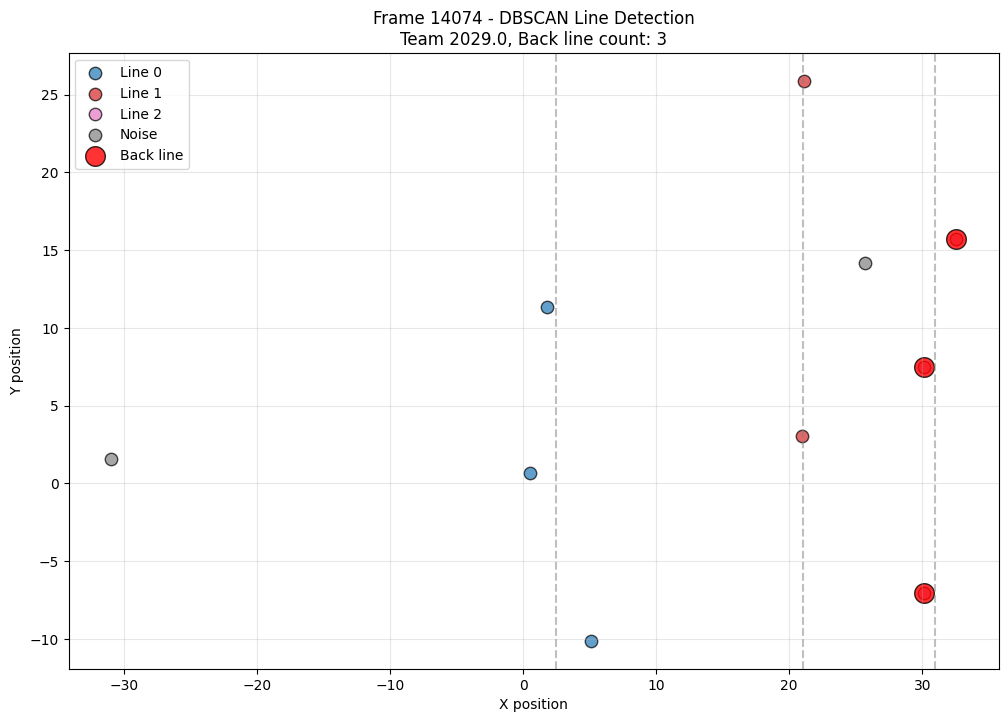

DBSCAN Lines:          3 defenders


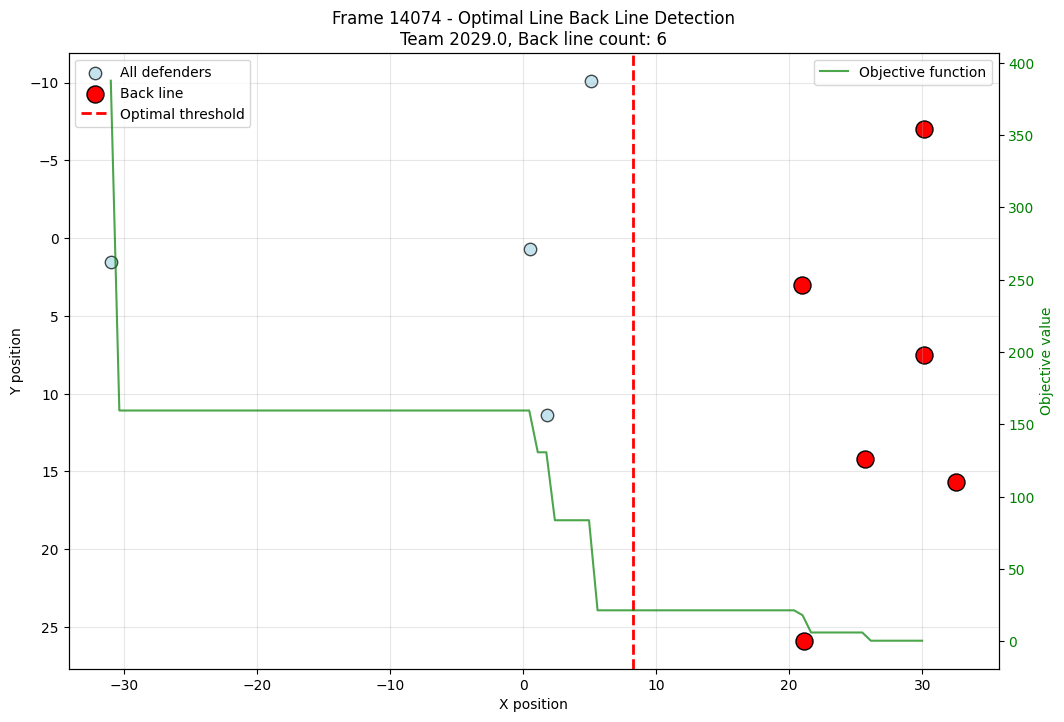

Optimal Line:          6 defenders


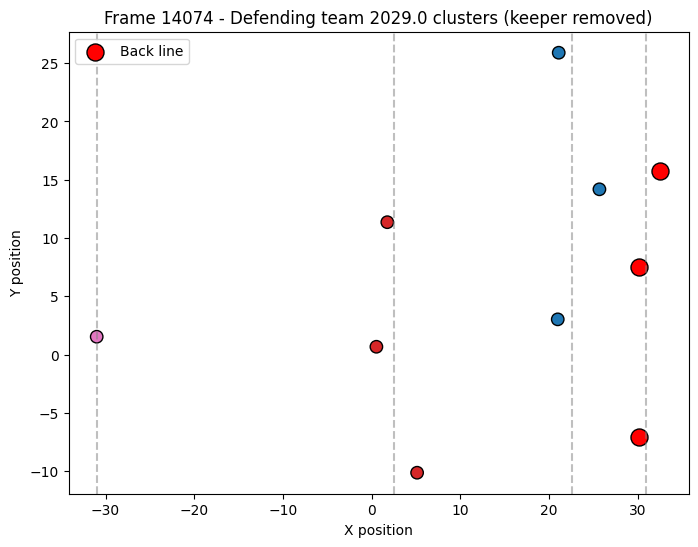

KMeans:          3 defenders


{'linear_regression': 3, 'dbscan': 3, 'optimal_line': 6, 'kmeans': 3}

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.linear_model import LinearRegression, RANSACRegressor
from scipy.spatial.distance import cdist
from scipy.optimize import minimize_scalar

def count_back_line_defenders(df, frame_id, direction, team_in_possession, max_clusters=4, plot=True, remove_keeper=True):
    frame_df = df[df['frame_id'] == frame_id]
    frame_df = frame_df[frame_df['team_id'] != 'ball']
    frame_df = frame_df[frame_df['team_id'].notna()]
    
    defending_team = frame_df[frame_df['team_id'] != team_in_possession].iloc[0]['team_id']
    defenders = frame_df[frame_df['team_id'] == defending_team].copy()
    if defenders.empty:
        return 0
    defenders = defenders[defenders['x'].notna()]
    
    if remove_keeper and not defenders.empty:
        if direction == "right_to_left":
            keeper_idx = defenders['x'].idxmin()
        elif direction == "left_to_right":
            keeper_idx = defenders['x'].idxmax()
        else:
            raise ValueError("direction must be 'left_to_right' or 'right_to_left'")
        defenders = defenders.drop(keeper_idx)
    
    if defenders.empty:
        return 0
    

    X = defenders[['x']].to_numpy()
    n_clusters = min(len(defenders), max_clusters)
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0).fit(X)
    defenders['cluster'] = kmeans.labels_
    
    centers = kmeans.cluster_centers_.flatten()
    
    if direction == "right_to_left":
        back_line_cluster = np.argmin(centers)
    elif direction == "left_to_right":
        back_line_cluster = np.argmax(centers)
    
    back_line_count = (defenders['cluster'] == back_line_cluster).sum()
    
    if plot:
        plt.figure(figsize=(8, 6))
        plt.scatter(defenders['x'], defenders['y'], 
                    c=defenders['cluster'], cmap='tab10', s=80, edgecolor='k')
        
        back_line_players = defenders[defenders['cluster'] == back_line_cluster]
        plt.scatter(back_line_players['x'], back_line_players['y'], 
                    c='red', s=150, edgecolor='black', marker='o', label='Back line')
        
        for c in centers:
            plt.axvline(x=c, color='gray', linestyle='--', alpha=0.5)
        
        # plt.gca().invert_yaxis()
        plt.xlabel("X position")
        plt.ylabel("Y position")
        plt.title(f"Frame {frame_id} - Defending team {defending_team} clusters (keeper removed)")
        plt.legend()
        plt.show()
    
    return back_line_count

def count_back_line_defenders_linear_regression(df, frame_id, direction, team_in_possession, 
                                               distance_threshold=3.0, plot=True, remove_keeper=True):
    frame_df = df[df['frame_id'] == frame_id]
    frame_df = frame_df[frame_df['team_id'] != 'ball']
    frame_df = frame_df[frame_df['team_id'].notna()]
    
    defending_team = frame_df[frame_df['team_id'] != team_in_possession].iloc[0]['team_id']
    defenders = frame_df[frame_df['team_id'] == defending_team].copy()
    
    if defenders.empty:
        return 0
    
    defenders = defenders[defenders['x'].notna() & defenders['y'].notna()]
    
    if remove_keeper and not defenders.empty:
        if direction == "right_to_left":
            keeper_idx = defenders['x'].idxmin()
        elif direction == "left_to_right":
            keeper_idx = defenders['x'].idxmax()
        else:
            raise ValueError("direction must be 'left_to_right' or 'right_to_left'")
        defenders = defenders.drop(keeper_idx)
    
    if len(defenders) < 2:
        return len(defenders)
    
    # Get the most defensive players (approximately 3-5 players)
    n_defensive = min(5, len(defenders))
    if direction == "right_to_left":
        most_defensive = defenders.nsmallest(n_defensive, 'x')
    else:
        most_defensive = defenders.nlargest(n_defensive, 'x')
    
    # Fit a line through these players using RANSAC for robustness
    X = most_defensive[['y']].values
    y = most_defensive[['x']].values.ravel()
    
    ransac = RANSACRegressor(random_state=0, residual_threshold=2.0)
    ransac.fit(X, y)
    
    # Calculate distances from all defenders to the fitted line
    def distance_to_line(points, line_model):
        """Calculate perpendicular distance from points to line"""
        X_points = points[['y']].values
        y_points = points['x'].values
        y_pred = line_model.predict(X_points)
        
        # For a line ax + by + c = 0, distance = |ax + by + c| / sqrt(a² + b²)
        # Our line is x = slope*y + intercept, so -slope*y + x - intercept = 0
        slope = line_model.estimator_.coef_[0]
        intercept = line_model.estimator_.intercept_
        
        distances = np.abs(-slope * X_points.ravel() + y_points - intercept) / np.sqrt(slope**2 + 1)
        return distances
    
    distances = distance_to_line(defenders, ransac)
    back_line_defenders = defenders[distances <= distance_threshold]
    
    if plot:
        plt.figure(figsize=(12, 8))
        
        # Plot all defenders
        plt.scatter(defenders['x'], defenders['y'], 
                   c='lightblue', s=80, edgecolor='k', alpha=0.7, label='All defenders')
        
        # Highlight most defensive players used for line fitting
        plt.scatter(most_defensive['x'], most_defensive['y'], 
                   c='orange', s=120, edgecolor='black', marker='s', 
                   label='Players used for line fitting')
        
        # Highlight back line defenders
        plt.scatter(back_line_defenders['x'], back_line_defenders['y'], 
                   c='red', s=150, edgecolor='black', marker='o', label='Back line')
        
        # Draw the fitted line
        y_range = np.linspace(defenders['y'].min(), defenders['y'].max(), 100)
        x_line = ransac.predict(y_range.reshape(-1, 1))
        plt.plot(x_line, y_range, 'r-', linewidth=2, label='Fitted defensive line')
        
        # Draw distance threshold boundaries
        slope = ransac.estimator_.coef_[0]
        intercept = ransac.estimator_.intercept_
        
        # Parallel lines at distance_threshold
        offset = distance_threshold * np.sqrt(slope**2 + 1)
        x_upper = x_line + offset
        x_lower = x_line - offset
        
        plt.plot(x_upper, y_range, 'r--', alpha=0.5, label=f'±{distance_threshold}m threshold')
        plt.plot(x_lower, y_range, 'r--', alpha=0.5)
        
        # plt.gca().invert_yaxis()
        plt.xlabel("X position")
        plt.ylabel("Y position")
        plt.title(f"Frame {frame_id} - Linear Regression Back Line Detection\n"
                 f"Team {defending_team}, Back line count: {len(back_line_defenders)}")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
    
    return len(back_line_defenders)


def count_back_line_defenders_dbscan_lines(df, frame_id, direction, team_in_possession, 
                                          eps=4.0, min_samples=2, plot=True, remove_keeper=True):
    """
    Use DBSCAN clustering to identify defensive lines, then count the most defensive line.
    """
    frame_df = df[df['frame_id'] == frame_id]
    frame_df = frame_df[frame_df['team_id'] != 'ball']
    frame_df = frame_df[frame_df['team_id'].notna()]
    
    defending_team = frame_df[frame_df['team_id'] != team_in_possession].iloc[0]['team_id']
    defenders = frame_df[frame_df['team_id'] == defending_team].copy()
    
    if defenders.empty:
        return 0
    
    defenders = defenders[defenders['x'].notna() & defenders['y'].notna()]
    
    if remove_keeper and not defenders.empty:
        if direction == "right_to_left":
            keeper_idx = defenders['x'].idxmin()
        elif direction == "left_to_right":
            keeper_idx = defenders['x'].idxmax()
        else:
            raise ValueError("direction must be 'left_to_right' or 'right_to_left'")
        defenders = defenders.drop(keeper_idx)
    
    if len(defenders) < 2:
        return len(defenders)
    
    # Use DBSCAN on X positions to find defensive lines
    X = defenders[['x']].values
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    defenders['line_cluster'] = dbscan.labels_
    
    # Find the most defensive line (cluster)
    valid_clusters = [c for c in np.unique(dbscan.labels_) if c != -1]  # -1 is noise
    
    if not valid_clusters:
        # No clear lines found, return all defenders
        back_line_count = len(defenders)
        back_line_defenders = defenders
    else:
        # Calculate mean X position for each cluster
        cluster_means = {}
        for cluster in valid_clusters:
            cluster_players = defenders[defenders['line_cluster'] == cluster]
            cluster_means[cluster] = cluster_players['x'].mean()
        
        # Find most defensive cluster
        if direction == "right_to_left":
            back_line_cluster = min(cluster_means, key=cluster_means.get)
        else:
            back_line_cluster = max(cluster_means, key=cluster_means.get)
        
        back_line_defenders = defenders[defenders['line_cluster'] == back_line_cluster]
        back_line_count = len(back_line_defenders)
    
    if plot:
        plt.figure(figsize=(12, 8))
        
        # Plot all defenders colored by cluster
        colors = plt.cm.tab10(np.linspace(0, 1, len(valid_clusters) + 1))
        
        for i, cluster in enumerate(valid_clusters):
            cluster_players = defenders[defenders['line_cluster'] == cluster]
            plt.scatter(cluster_players['x'], cluster_players['y'], 
                       c=[colors[i]], s=80, edgecolor='k', alpha=0.7, 
                       label=f'Line {cluster}')
        
        # Plot noise points
        noise_players = defenders[defenders['line_cluster'] == -1]
        if not noise_players.empty:
            plt.scatter(noise_players['x'], noise_players['y'], 
                       c='gray', s=80, edgecolor='k', alpha=0.7, 
                       label='Noise')
        
        # Highlight back line
        if len(back_line_defenders) > 0:
            plt.scatter(back_line_defenders['x'], back_line_defenders['y'], 
                       c='red', s=200, edgecolor='black', marker='o', 
                       alpha=0.8, label='Back line')
        
        # Draw vertical lines for each cluster center
        for cluster in valid_clusters:
            cluster_players = defenders[defenders['line_cluster'] == cluster]
            mean_x = cluster_players['x'].mean()
            plt.axvline(x=mean_x, color='gray', linestyle='--', alpha=0.5)
        
        # plt.gca().invert_yaxis()
        plt.xlabel("X position")
        plt.ylabel("Y position")
        plt.title(f"Frame {frame_id} - DBSCAN Line Detection\n"
                 f"Team {defending_team}, Back line count: {back_line_count}")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
    
    return back_line_count



def count_back_line_defenders_optimal_line(df, frame_id, direction, team_in_possession, 
                                          plot=True, remove_keeper=True):
    """
    Find the optimal line that maximizes the number of defenders behind it
    while minimizing the variance in their X positions.
    """
    frame_df = df[df['frame_id'] == frame_id]
    frame_df = frame_df[frame_df['team_id'] != 'ball']
    frame_df = frame_df[frame_df['team_id'].notna()]
    
    defending_team = frame_df[frame_df['team_id'] != team_in_possession].iloc[0]['team_id']
    defenders = frame_df[frame_df['team_id'] == defending_team].copy()
    
    if defenders.empty:
        return 0
    
    defenders = defenders[defenders['x'].notna() & defenders['y'].notna()]
    
    if remove_keeper and not defenders.empty:
        if direction == "right_to_left":
            keeper_idx = defenders['x'].idxmin()
        elif direction == "left_to_right":
            keeper_idx = defenders['x'].idxmax()
        else:
            raise ValueError("direction must be 'left_to_right' or 'right_to_left'")
        defenders = defenders.drop(keeper_idx)
    
    if len(defenders) < 2:
        return len(defenders)
    
    def objective_function(x_threshold):
        """Objective function to minimize"""
        if direction == "right_to_left":
            candidates = defenders[defenders['x'] <= x_threshold]
        else:
            candidates = defenders[defenders['x'] >= x_threshold]
        
        if len(candidates) < 2:
            return float('inf')
        
        # We want to maximize count and minimize X variance
        count = len(candidates)
        x_variance = candidates['x'].var()
        
        # Objective: minimize variance while encouraging reasonable count
        # Higher count gets negative weight (we want to maximize it)
        return x_variance - 0.5 * count
    
    # Search for optimal threshold
    x_min, x_max = defenders['x'].min(), defenders['x'].max()
    result = minimize_scalar(objective_function, bounds=(x_min, x_max), method='bounded')
    
    optimal_threshold = result.x
    
    if direction == "right_to_left":
        back_line_defenders = defenders[defenders['x'] <= optimal_threshold]
    else:
        back_line_defenders = defenders[defenders['x'] >= optimal_threshold]
    
    if plot:
        plt.figure(figsize=(12, 8))
        
        # Plot all defenders
        plt.scatter(defenders['x'], defenders['y'], 
                   c='lightblue', s=80, edgecolor='k', alpha=0.7, label='All defenders')
        
        # Highlight back line defenders
        plt.scatter(back_line_defenders['x'], back_line_defenders['y'], 
                   c='red', s=150, edgecolor='black', marker='o', label='Back line')
        
        # Draw optimal threshold line
        plt.axvline(x=optimal_threshold, color='red', linestyle='--', 
                   linewidth=2, label=f'Optimal threshold')
        
        # Show objective function curve
        x_range = np.linspace(x_min, x_max, 100)
        objectives = [objective_function(x) if not np.isinf(objective_function(x)) else np.nan 
                     for x in x_range]
        
        # Create secondary plot for objective function
        ax1 = plt.gca()
        ax2 = ax1.twinx()
        ax2.plot(x_range, objectives, 'g-', alpha=0.7, label='Objective function')
        ax2.set_ylabel('Objective value', color='g')
        ax2.tick_params(axis='y', labelcolor='g')
        
        ax1.invert_yaxis()
        ax1.set_xlabel("X position")
        ax1.set_ylabel("Y position")
        ax1.set_title(f"Frame {frame_id} - Optimal Line Back Line Detection\n"
                     f"Team {defending_team}, Back line count: {len(back_line_defenders)}")
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')
        ax1.grid(True, alpha=0.3)
        plt.show()
    
    return len(back_line_defenders)


def compare_line_methods(df, frame_id, direction, team_in_possession, remove_keeper=True):
    """Compare all line-based methods."""
    print(f"Comparing line-based methods for Frame {frame_id}:")
    print("-" * 60)
    
    # Linear regression method
    lr_result = count_back_line_defenders_linear_regression(
        df, frame_id, direction, team_in_possession, remove_keeper=remove_keeper
    )
    print(f"Linear Regression:     {lr_result} defenders")
    
    # DBSCAN method
    dbscan_result = count_back_line_defenders_dbscan_lines(
        df, frame_id, direction, team_in_possession, remove_keeper=remove_keeper
    )
    print(f"DBSCAN Lines:          {dbscan_result} defenders")
    
    # Optimal Line method
    optimal_result = count_back_line_defenders_optimal_line(
        df, frame_id, direction, team_in_possession, remove_keeper=remove_keeper
    )
    print(f"Optimal Line:          {optimal_result} defenders")

    #KMeans method
    kmeans_result = count_back_line_defenders(tracking, frame_id, direction, team_in_possession, plot=True)
    print(f"KMeans:          {kmeans_result} defenders")
    
    return {
        'linear_regression': lr_result,
        'dbscan': dbscan_result,
        'optimal_line': optimal_result,
        'kmeans': kmeans_result
    }
# compare_line_methods(tracking, frame_id=1192, direction="right_to_left", team_in_possession = 2029, remove_keeper=True)
compare_line_methods(tracking, frame_id=14074, direction="left_to_right", team_in_possession = 2661, remove_keeper=True)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_player_heatmap_by_period(tracking, player_id, bins=(50, 34)):
    """
    Plot heatmap of player positions for each period on a football pitch.
    
    tracking : DataFrame with columns ["x", "y", "player_id", "period_id", "timestamp"]
    player_id : the player to filter
    bins : (x_bins, y_bins) for the heatmap resolution
    """
    # Filter player positions
    player_data = tracking[tracking["player_id"] == player_id]

    if player_data.empty:
        print(f"No data found for player_id={player_id}")
        return
    
    # Pitch dimensions
    x_min, x_max = -52.5, 52.5
    y_min, y_max = -34, 34

    # Loop through periods (1 = first half, 2 = second half, etc.)
    periods = sorted(player_data["period_id"].unique())
    
    for period in periods:
        period_data = player_data[player_data["period_id"] == period]
        
        if period_data.empty:
            continue

        # Get timestamp range
        min_time = period_data["timestamp"].min()
        max_time = period_data["timestamp"].max()

        print(f"Period {period}: Timestamp range {min_time} → {max_time}")

        plt.figure(figsize=(10, 7))

        # Draw pitch outline
        plt.plot([x_min, x_max, x_max, x_min, x_min], 
                 [y_min, y_min, y_max, y_max, y_min], color="black")

        # Heatmap
        sns.kdeplot(
            x=period_data["x"], 
            y=period_data["y"],
            fill=True, cmap="coolwarm",
            bw_adjust=1,
            thresh=0.05,
            levels=50
        )

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.gca().set_aspect("equal", adjustable="box")
        plt.title(f"Player {player_id} Heatmap (Period {period})\n"
                  f"Timestamps: {min_time} → {max_time}")
        plt.xlabel("X (Pitch length in meters)")
        plt.ylabel("Y (Pitch width in meters)")
        plt.show()

# Example usage:
print(tracking.columns.tolist())
plot_player_heatmap_by_period(tracking, player_id=22562)


['x', 'y', 'z', 'speed', 'period_id', 'timestamp', 'frame_id', 'ball_owning_team_id', 'ball_state', 'player_id', 'd', 'player_name', 'team_id', 'team_name', 'jersey_number']
No data found for player_id=22562


In [11]:
print(poss.columns.to_list())
print(poss[['frame_start','frame_end']].head())
frame_min=234
frame_max = 258
filtered_pass_opts = pass_opts[
    (pass_opts["frame_start"].between(frame_min, frame_max)) |
    (pass_opts["frame_end"].between(frame_min, frame_max))
]

print(filtered_pass_opts.head())

['event_id', 'index', 'match_id', 'frame_start', 'frame_end', 'time_start', 'time_end', 'minute_start', 'second_start', 'duration', 'period', 'attacking_side_id', 'attacking_side', 'event_type_id', 'event_type', 'player_id', 'player_name', 'player_position_id', 'player_position', 'team_id', 'team_shortname', 'x_start', 'y_start', 'channel_id_start', 'channel_start', 'third_id_start', 'third_start', 'penalty_area_start', 'x_end', 'y_end', 'channel_id_end', 'channel_end', 'third_id_end', 'third_end', 'penalty_area_end', 'game_state_id', 'game_state', 'team_score', 'opponent_team_score', 'phase_index', 'player_possession_phase_index', 'first_player_possession_in_team_possession', 'last_player_possession_in_team_possession', 'lead_to_different_phase', 'issued_from_different_phase', 'n_player_possessions_in_phase', 'team_possession_loss_in_phase', 'team_in_possession_phase_type_id', 'team_in_possession_phase_type', 'team_out_of_possession_phase_type_id', 'team_out_of_possession_phase_type',

In [12]:
print(poss['attacking_side'].unique())
print(poss[['channel_start','channel_end','third_start','third_end']].head())
print(pass_opts[['player_in_possession_position','player_position']])

['right_to_left' 'left_to_right']
  channel_start channel_end      third_start        third_end
0        center      center     middle_third     middle_third
1        center      center  defensive_third  defensive_third
2    wide_right  wide_right  defensive_third  defensive_third
3        center      center  defensive_third  defensive_third
4    wide_right  wide_right  defensive_third  defensive_third
     player_in_possession_position player_position
0                               GK             LCB
1                               GK              CB
2                               GK             RCB
3                              RCB              GK
4                               GK             LCB
...                            ...             ...
2638                           RDM             LCB
2639                           RDM              AM
2640                           RDM             RCB
2641                           RDM              CF
2642                           RD

In [13]:

poss_keep = [
    "event_id","match_id","frame_start","frame_end",
    "player_id","player_name","player_position",
    "team_id","team_shortname",
    "x_start","y_start","x_end","y_end",
    "defensive_structure","n_defensive_lines",
    "pass_distance","pass_range","pass_angle","pass_direction",
    "player_targeted_xthreat",
    "n_passing_options","n_off_ball_runs", "pass_outcome", "lead_to_shot", "lead_to_goal", "pass_ahead", "channel_start",
    "channel_end", "third_start", "third_end", "attacking_side"
]
poss = poss[[c for c in poss_keep if c in poss.columns]]
pass_opts_keep = [
    "event_id","match_id","frame_start","frame_end",
    "player_id","player_name","player_position",
    "player_in_possession_id","player_in_possession_name",
    "x_start","y_start","x_end","y_end",
    "defensive_structure","n_defensive_lines",
    "first_line_break","last_line_break","n_opponents_bypassed",
    "xthreat","passing_option_score","xpass_completion",
    "targeted","received","dangerous", "penalty_area_start", "penalty_area_end", "associated_off_ball_run_event_id",
    "pass_range", "pass_distance", "pass_ahead", "channel_start",
    "channel_end", "third_start", "third_end", "attacking_side"
]
pass_opts = pass_opts[[c for c in pass_opts_keep if c in pass_opts.columns]]

runs_keep = [
    "event_id","match_id","frame_start","frame_end",
    "player_id","player_name","player_position",
    "x_start","y_start","x_end","y_end",
    "channel_start","channel_end","third_start","third_end",
    "intended_run_behind","break_defensive_line","push_defensive_line",
    "xthreat","n_opponents_ahead_start","n_opponents_ahead_end","lead_to_shot", "lead_to_goal", "passing_option_score", "difficult_pass_target", "targeted", "received", "dangerous", "penalty_area_start", "penalty_area_end", "attacking_side"
]
runs = runs[[c for c in runs_keep if c in runs.columns]]

tracking_keep = [
    "timestamp","frame_id", "period",
    "player_id","player_name","team_id","team_name",
    "x","y","speed","jersey_number","ball_state","ball_owning_team_id"
]
tracking = tracking[[c for c in tracking_keep if c in tracking.columns]]


In [14]:
events = poss.merge(pass_opts, on=["match_id","frame_start","frame_end"], how="left", suffixes=("_poss","_pass"))
events = events.merge(runs, on=["match_id","frame_start","frame_end"], how="left", suffixes=("","_run"))
events = events.merge(
    tracking[["frame_id", "ball_owning_team_id"]],
    left_on="frame_end",
    right_on="frame_id",
    how="left"
).drop(columns=["frame_id"])

In [15]:
def classify_zone(x, y, pitch_length=105, pitch_width=68):
    """
    Simple zone classification: wide / half-space / central
    Assumes pitch centered at (0,0) with width symmetrical
    """
    third_w = pitch_width / 6  # half-space ~ central strip
    if abs(y) > (pitch_width/2 - third_w):
        return "wide"
    elif abs(y) > (third_w):
        return "half-space"
    else:
        return "central"

events["zone"] = events.apply(lambda r: classify_zone(r["x_start"], r["y_start"]), axis=1)

def calc_defensive_metrics(frame_window, tracking_df):
    """Compute line width & depth for defenders in a frame window"""
    frames = tracking_df[
        (tracking_df["frame_id"] >= frame_window.frame_start) &
        (tracking_df["frame_id"] <= frame_window.frame_end) &
        (tracking_df["team_id"] != frame_window.ball_owning_team_id)  # defending team only
    ]
    if frames.empty:
        return pd.Series({"def_line_width": np.nan, "def_line_depth": np.nan})

    # crude filter: take last 4 or 5 players closest to own goal
    defenders = frames.groupby("frame_id").apply(
        lambda f: f.nsmallest(5, "x")  # adjust for attacking direction
    ).reset_index(drop=True)

    width = defenders["y"].max() - defenders["y"].min()
    depth = defenders["x"].max() - defenders["x"].min()
    return pd.Series({"def_line_width": width, "def_line_depth": depth})

In [ ]:
metrics = events.apply(lambda row: calc_defensive_metrics(row, tracking), axis=1)
events = pd.concat([events, metrics], axis=1)

In [ ]:
xthreat_summary = events.groupby("defensive_structure_poss")["xthreat"].mean()
zone_threat = events.groupby(["defensive_structure_poss","zone"])["xthreat"].mean().unstack()
compactness_summary = events.groupby("defensive_structure_poss")[["def_line_width","def_line_depth"]].mean()


In [ ]:
print("Average xThreat by Defensive Structure:\n", xthreat_summary, "\n")
print("Zone-based Vulnerability (mean xThreat):\n", zone_threat, "\n")
print("Compactness Metrics:\n", compactness_summary, "\n")

Average xThreat by Defensive Structure:
 defensive_structure_poss
343.0     0.002867
352.0     0.002400
424.0     0.005314
433.0     0.006800
442.0     0.003300
451.0     0.009068
523.0     0.004305
532.0     0.002671
541.0     0.007569
4123.0    0.001467
4132.0    0.003260
4141.0    0.006948
4231.0    0.001963
4312.0    0.003338
4321.0    0.014650
4411.0    0.005414
5131.0    0.000617
Name: xthreat, dtype: float64 

Zone-based Vulnerability (mean xThreat):
 zone                       central
defensive_structure_poss          
343.0                     0.002867
352.0                     0.002400
424.0                     0.005314
433.0                     0.006800
442.0                     0.003300
451.0                     0.009068
523.0                     0.004305
532.0                     0.002671
541.0                     0.007569
4123.0                    0.001467
4132.0                    0.003260
4141.0                    0.006948
4231.0                    0.001963
4312.0      

In [ ]:
print("Compactness Metrics:\n", compactness_summary, "\n")

Compactness Metrics:
                           def_line_width  def_line_depth
defensive_structure_poss                                
343.0                          32.183000       26.730333
352.0                          28.636744       34.185814
424.0                          32.014146       26.051098
433.0                          30.202449       23.265306
442.0                          31.912530       24.660964
451.0                          29.650870       23.870435
523.0                          30.800976       22.924390
532.0                          27.293846       21.307747
541.0                          26.471282       18.844615
4123.0                         25.607500       30.171250
4132.0                         26.921667       20.383333
4141.0                         31.806429       25.529286
4231.0                         31.951692       26.894308
4312.0                         36.563750       28.267500
4321.0                         28.132000       24.721000
4411.0   

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.linear_model import LinearRegression, RANSACRegressor
from scipy.spatial.distance import cdist
from scipy.optimize import minimize_scalar

def filter_attacking_third(df):
        if 'third_end' in df.columns:
            return df[df['third_end'] == 'attacking_third']
        elif 'third_start' in df.columns:
            return df[df['third_start'] == 'attacking_third']
        else:
            print("Warning: No third column found for filtering")
            return df

def extract_back_line_formation(defensive_structure):
        if pd.isna(defensive_structure):
            return None
        formation_str = str(defensive_structure)
        try:
            return int(formation_str[0])
        except (ValueError, IndexError):
            return None
        

def count_back_line_defenders_kmeans(df, frame_id, direction, team_in_possession, max_clusters=4, plot=True, remove_keeper=True):
    frame_df = df[df['frame_id'] == frame_id]
    frame_df = frame_df[frame_df['team_id'] != 'ball']
    frame_df = frame_df[frame_df['team_id'].notna()]
    
    defending_team = frame_df[frame_df['team_id'] != team_in_possession].iloc[0]['team_id']
    defenders = frame_df[frame_df['team_id'] == defending_team].copy()
    if defenders.empty:
        return 0
    defenders = defenders[defenders['x'].notna()]
    
    if remove_keeper and not defenders.empty:
        if direction == "right_to_left":
            keeper_idx = defenders['x'].idxmin()
        elif direction == "left_to_right":
            keeper_idx = defenders['x'].idxmax()
        else:
            raise ValueError("direction must be 'left_to_right' or 'right_to_left'")
        defenders = defenders.drop(keeper_idx)
    
    if defenders.empty:
        return 0
    

    X = defenders[['x']].to_numpy()
    n_clusters = min(len(defenders), max_clusters)
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0).fit(X)
    defenders['cluster'] = kmeans.labels_
    
    centers = kmeans.cluster_centers_.flatten()
    
    if direction == "right_to_left":
        back_line_cluster = np.argmin(centers)
    elif direction == "left_to_right":
        back_line_cluster = np.argmax(centers)
    
    back_line_count = (defenders['cluster'] == back_line_cluster).sum()
    
    if plot:
        plt.figure(figsize=(8, 6))
        plt.scatter(defenders['x'], defenders['y'], 
                    c=defenders['cluster'], cmap='tab10', s=80, edgecolor='k')
        
        back_line_players = defenders[defenders['cluster'] == back_line_cluster]
        plt.scatter(back_line_players['x'], back_line_players['y'], 
                    c='red', s=150, edgecolor='black', marker='o', label='Back line')
        
        for c in centers:
            plt.axvline(x=c, color='gray', linestyle='--', alpha=0.5)
        
        # plt.gca().invert_yaxis()
        plt.xlabel("X position")
        plt.ylabel("Y position")
        plt.title(f"Frame {frame_id} - Defending team {defending_team} clusters (keeper removed)")
        plt.legend()
        plt.show()
    
    return back_line_count

def count_back_line_defenders_linear_regression(df, frame_id, direction, team_in_possession, 
                                               distance_threshold=3.0, plot=True, remove_keeper=True):
    frame_df = df[df['frame_id'] == frame_id]
    frame_df = frame_df[frame_df['team_id'] != 'ball']
    frame_df = frame_df[frame_df['team_id'].notna()]
    
    defending_team = frame_df[frame_df['team_id'] != team_in_possession].iloc[0]['team_id']
    defenders = frame_df[frame_df['team_id'] == defending_team].copy()
    
    if defenders.empty:
        return 0
    
    defenders = defenders[defenders['x'].notna() & defenders['y'].notna()]
    
    if remove_keeper and not defenders.empty:
        if direction == "right_to_left":
            keeper_idx = defenders['x'].idxmin()
        elif direction == "left_to_right":
            keeper_idx = defenders['x'].idxmax()
        else:
            raise ValueError("direction must be 'left_to_right' or 'right_to_left'")
        defenders = defenders.drop(keeper_idx)
    
    if len(defenders) < 2:
        return len(defenders)
    
    # Get the most defensive players (approximately 3-5 players)
    n_defensive = min(5, len(defenders))
    if direction == "right_to_left":
        most_defensive = defenders.nsmallest(n_defensive, 'x')
    else:
        most_defensive = defenders.nlargest(n_defensive, 'x')
    
    # Fit a line through these players using RANSAC for robustness
    X = most_defensive[['y']].values
    y = most_defensive[['x']].values.ravel()
    
    ransac = RANSACRegressor(random_state=0, residual_threshold=2.0)
    ransac.fit(X, y)
    
    # Calculate distances from all defenders to the fitted line
    def distance_to_line(points, line_model):
        """Calculate perpendicular distance from points to line"""
        X_points = points[['y']].values
        y_points = points['x'].values
        y_pred = line_model.predict(X_points)
        
        # For a line ax + by + c = 0, distance = |ax + by + c| / sqrt(a² + b²)
        # Our line is x = slope*y + intercept, so -slope*y + x - intercept = 0
        slope = line_model.estimator_.coef_[0]
        intercept = line_model.estimator_.intercept_
        
        distances = np.abs(-slope * X_points.ravel() + y_points - intercept) / np.sqrt(slope**2 + 1)
        return distances
    
    distances = distance_to_line(defenders, ransac)
    back_line_defenders = defenders[distances <= distance_threshold]
    
    if plot:
        plt.figure(figsize=(12, 8))
        
        # Plot all defenders
        plt.scatter(defenders['x'], defenders['y'], 
                   c='lightblue', s=80, edgecolor='k', alpha=0.7, label='All defenders')
        
        # Highlight most defensive players used for line fitting
        plt.scatter(most_defensive['x'], most_defensive['y'], 
                   c='orange', s=120, edgecolor='black', marker='s', 
                   label='Players used for line fitting')
        
        # Highlight back line defenders
        plt.scatter(back_line_defenders['x'], back_line_defenders['y'], 
                   c='red', s=150, edgecolor='black', marker='o', label='Back line')
        
        # Draw the fitted line
        y_range = np.linspace(defenders['y'].min(), defenders['y'].max(), 100)
        x_line = ransac.predict(y_range.reshape(-1, 1))
        plt.plot(x_line, y_range, 'r-', linewidth=2, label='Fitted defensive line')
        
        # Draw distance threshold boundaries
        slope = ransac.estimator_.coef_[0]
        intercept = ransac.estimator_.intercept_
        
        # Parallel lines at distance_threshold
        offset = distance_threshold * np.sqrt(slope**2 + 1)
        x_upper = x_line + offset
        x_lower = x_line - offset
        
        plt.plot(x_upper, y_range, 'r--', alpha=0.5, label=f'±{distance_threshold}m threshold')
        plt.plot(x_lower, y_range, 'r--', alpha=0.5)
        
        # plt.gca().invert_yaxis()
        plt.xlabel("X position")
        plt.ylabel("Y position")
        plt.title(f"Frame {frame_id} - Linear Regression Back Line Detection\n"
                 f"Team {defending_team}, Back line count: {len(back_line_defenders)}")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
    
    return len(back_line_defenders)


def count_back_line_defenders_dbscan_lines(df, frame_id, direction, team_in_possession, 
                                          eps=4.0, min_samples=2, plot=True, remove_keeper=True):
    frame_df = df[df['frame_id'] == frame_id]
    frame_df = frame_df[frame_df['team_id'] != 'ball']
    frame_df = frame_df[frame_df['team_id'].notna()]
    
    defending_team = frame_df[frame_df['team_id'] != team_in_possession].iloc[0]['team_id']
    defenders = frame_df[frame_df['team_id'] == defending_team].copy()
    
    if defenders.empty:
        return 0
    
    defenders = defenders[defenders['x'].notna() & defenders['y'].notna()]
    
    if remove_keeper and not defenders.empty:
        if direction == "right_to_left":
            keeper_idx = defenders['x'].idxmin()
        elif direction == "left_to_right":
            keeper_idx = defenders['x'].idxmax()
        else:
            raise ValueError("direction must be 'left_to_right' or 'right_to_left'")
        defenders = defenders.drop(keeper_idx)
    
    if len(defenders) < 2:
        return len(defenders)
    
    # Use DBSCAN on X positions to find defensive lines
    X = defenders[['x']].values
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    defenders['line_cluster'] = dbscan.labels_
    
    # Find the most defensive line (cluster)
    valid_clusters = [c for c in np.unique(dbscan.labels_) if c != -1]  # -1 is noise
    
    if not valid_clusters:
        # No clear lines found, return all defenders
        back_line_count = len(defenders)
        back_line_defenders = defenders
    else:
        # Calculate mean X position for each cluster
        cluster_means = {}
        for cluster in valid_clusters:
            cluster_players = defenders[defenders['line_cluster'] == cluster]
            cluster_means[cluster] = cluster_players['x'].mean()
        
        # Find most defensive cluster
        if direction == "right_to_left":
            back_line_cluster = min(cluster_means, key=cluster_means.get)
        else:
            back_line_cluster = max(cluster_means, key=cluster_means.get)
        
        back_line_defenders = defenders[defenders['line_cluster'] == back_line_cluster]
        back_line_count = len(back_line_defenders)
    
    if plot:
        plt.figure(figsize=(12, 8))
        
        # Plot all defenders colored by cluster
        colors = plt.cm.tab10(np.linspace(0, 1, len(valid_clusters) + 1))
        
        for i, cluster in enumerate(valid_clusters):
            cluster_players = defenders[defenders['line_cluster'] == cluster]
            plt.scatter(cluster_players['x'], cluster_players['y'], 
                       c=[colors[i]], s=80, edgecolor='k', alpha=0.7, 
                       label=f'Line {cluster}')
        
        # Plot noise points
        noise_players = defenders[defenders['line_cluster'] == -1]
        if not noise_players.empty:
            plt.scatter(noise_players['x'], noise_players['y'], 
                       c='gray', s=80, edgecolor='k', alpha=0.7, 
                       label='Noise')
        
        # Highlight back line
        if len(back_line_defenders) > 0:
            plt.scatter(back_line_defenders['x'], back_line_defenders['y'], 
                       c='red', s=200, edgecolor='black', marker='o', 
                       alpha=0.8, label='Back line')
        
        # Draw vertical lines for each cluster center
        for cluster in valid_clusters:
            cluster_players = defenders[defenders['line_cluster'] == cluster]
            mean_x = cluster_players['x'].mean()
            plt.axvline(x=mean_x, color='gray', linestyle='--', alpha=0.5)
        
        # plt.gca().invert_yaxis()
        plt.xlabel("X position")
        plt.ylabel("Y position")
        plt.title(f"Frame {frame_id} - DBSCAN Line Detection\n"
                 f"Team {defending_team}, Back line count: {back_line_count}")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
    
    return back_line_count



def count_back_line_defenders_optimal_line(df, frame_id, direction, team_in_possession, 
                                          plot=True, remove_keeper=True):
    frame_df = df[df['frame_id'] == frame_id]
    frame_df = frame_df[frame_df['team_id'] != 'ball']
    frame_df = frame_df[frame_df['team_id'].notna()]
    
    defending_team = frame_df[frame_df['team_id'] != team_in_possession].iloc[0]['team_id']
    defenders = frame_df[frame_df['team_id'] == defending_team].copy()
    
    if defenders.empty:
        return 0
    
    defenders = defenders[defenders['x'].notna() & defenders['y'].notna()]
    
    if remove_keeper and not defenders.empty:
        if direction == "right_to_left":
            keeper_idx = defenders['x'].idxmin()
        elif direction == "left_to_right":
            keeper_idx = defenders['x'].idxmax()
        else:
            raise ValueError("direction must be 'left_to_right' or 'right_to_left'")
        defenders = defenders.drop(keeper_idx)
    
    if len(defenders) < 2:
        return len(defenders)
    
    def objective_function(x_threshold):
        """Objective function to minimize"""
        if direction == "right_to_left":
            candidates = defenders[defenders['x'] <= x_threshold]
        else:
            candidates = defenders[defenders['x'] >= x_threshold]
        
        if len(candidates) < 2:
            return float('inf')
        
        # We want to maximize count and minimize X variance
        count = len(candidates)
        x_variance = candidates['x'].var()
        
        # Objective: minimize variance while encouraging reasonable count
        # Higher count gets negative weight (we want to maximize it)
        return x_variance - 0.5 * count
    
    # Search for optimal threshold
    x_min, x_max = defenders['x'].min(), defenders['x'].max()
    result = minimize_scalar(objective_function, bounds=(x_min, x_max), method='bounded')
    
    optimal_threshold = result.x
    
    if direction == "right_to_left":
        back_line_defenders = defenders[defenders['x'] <= optimal_threshold]
    else:
        back_line_defenders = defenders[defenders['x'] >= optimal_threshold]
    
    if plot:
        plt.figure(figsize=(12, 8))
        
        # Plot all defenders
        plt.scatter(defenders['x'], defenders['y'], 
                   c='lightblue', s=80, edgecolor='k', alpha=0.7, label='All defenders')
        
        # Highlight back line defenders
        plt.scatter(back_line_defenders['x'], back_line_defenders['y'], 
                   c='red', s=150, edgecolor='black', marker='o', label='Back line')
        
        # Draw optimal threshold line
        plt.axvline(x=optimal_threshold, color='red', linestyle='--', 
                   linewidth=2, label=f'Optimal threshold')
        
        # Show objective function curve
        x_range = np.linspace(x_min, x_max, 100)
        objectives = [objective_function(x) if not np.isinf(objective_function(x)) else np.nan 
                     for x in x_range]
        
        # Create secondary plot for objective function
        ax1 = plt.gca()
        ax2 = ax1.twinx()
        ax2.plot(x_range, objectives, 'g-', alpha=0.7, label='Objective function')
        ax2.set_ylabel('Objective value', color='g')
        ax2.tick_params(axis='y', labelcolor='g')
        
        ax1.invert_yaxis()
        ax1.set_xlabel("X position")
        ax1.set_ylabel("Y position")
        ax1.set_title(f"Frame {frame_id} - Optimal Line Back Line Detection\n"
                     f"Team {defending_team}, Back line count: {len(back_line_defenders)}")
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')
        ax1.grid(True, alpha=0.3)
        plt.show()
    
    return len(back_line_defenders)

Possession shape before filter: (1056, 31)
Possession shape before filter: (181, 31)


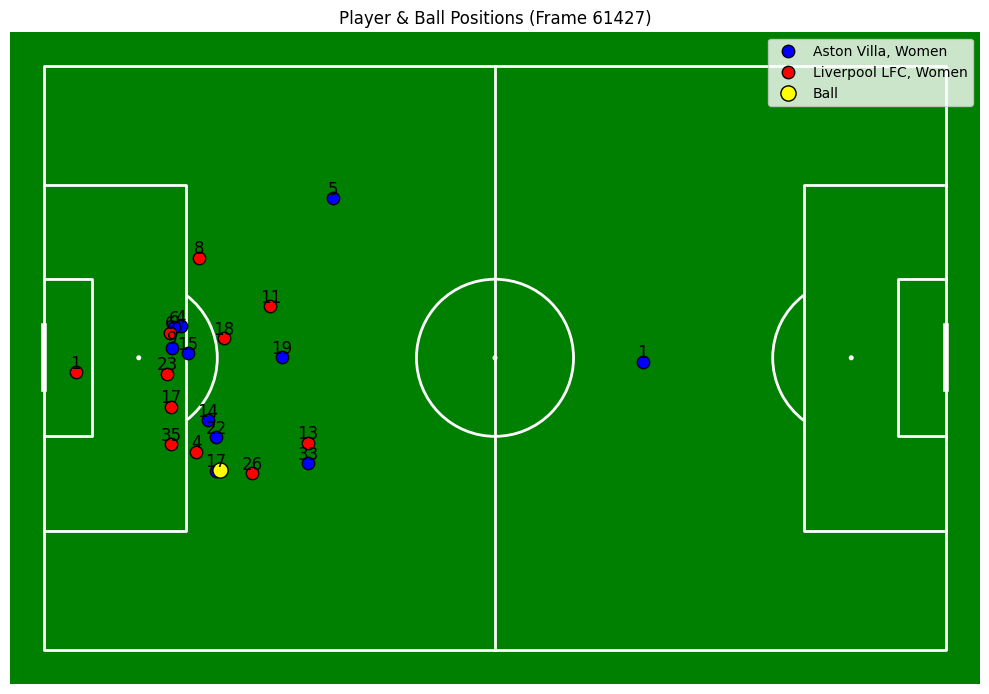

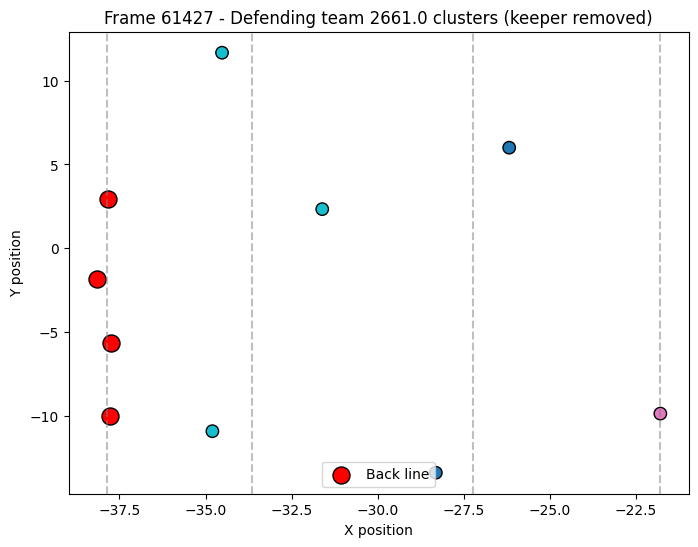

4.0


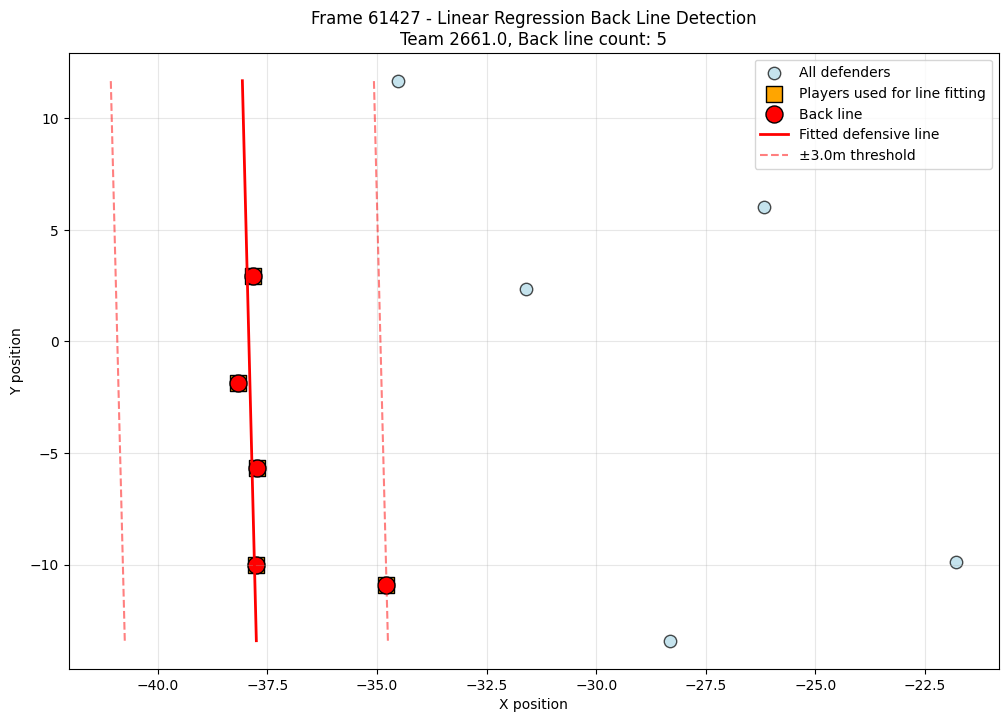

5.0


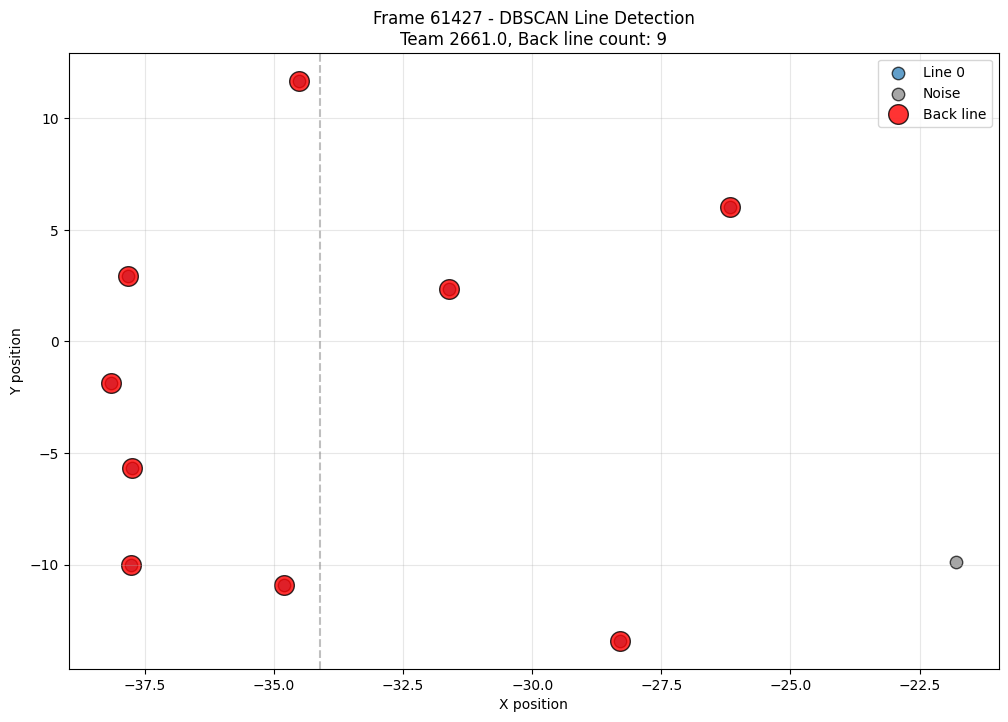

9.0


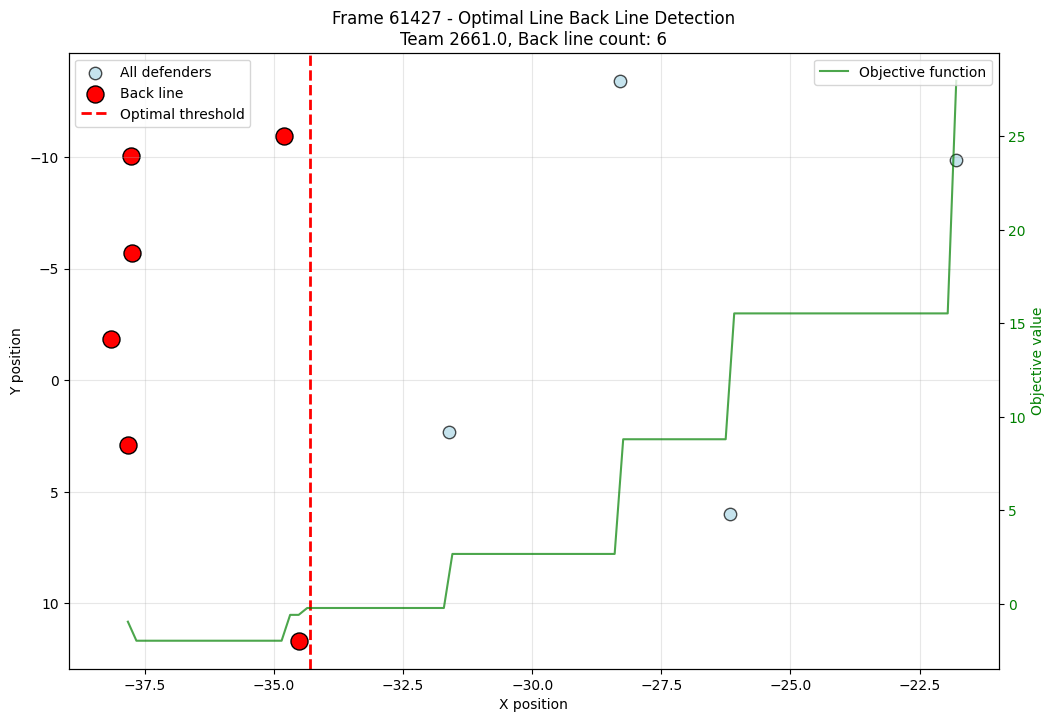

6.0


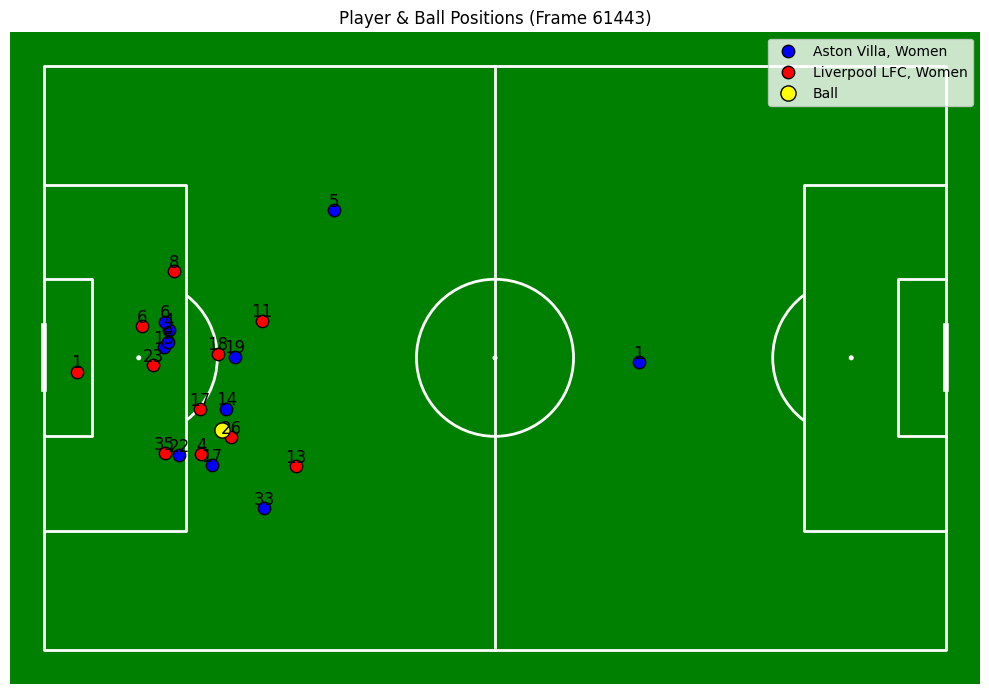

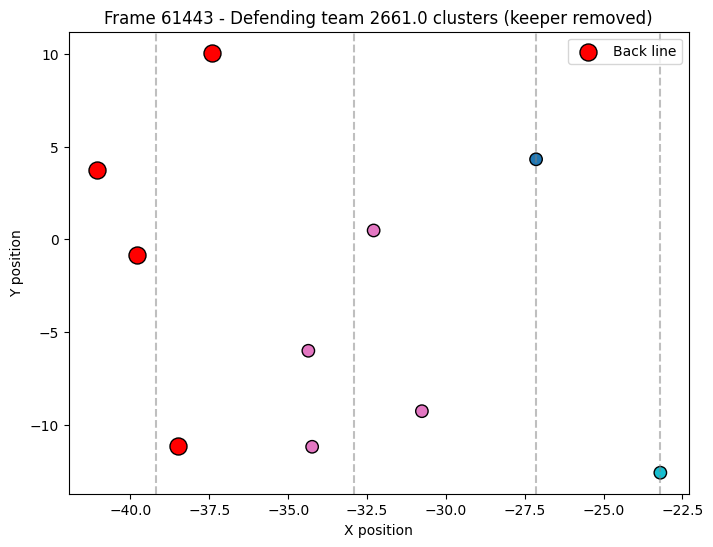

4.0


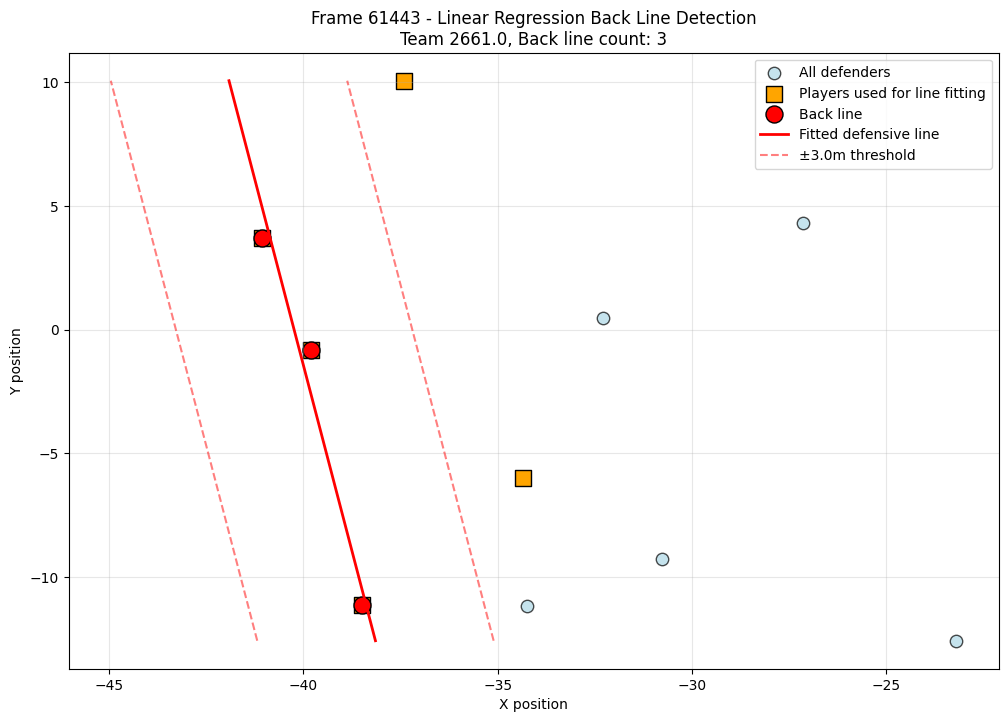

3.0


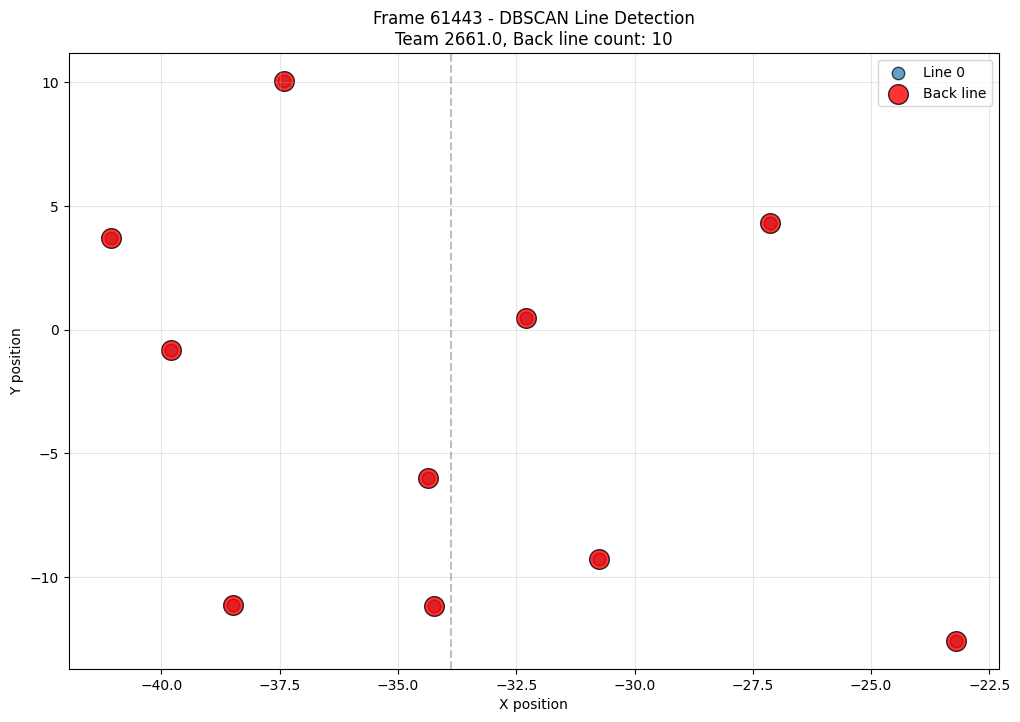

10.0


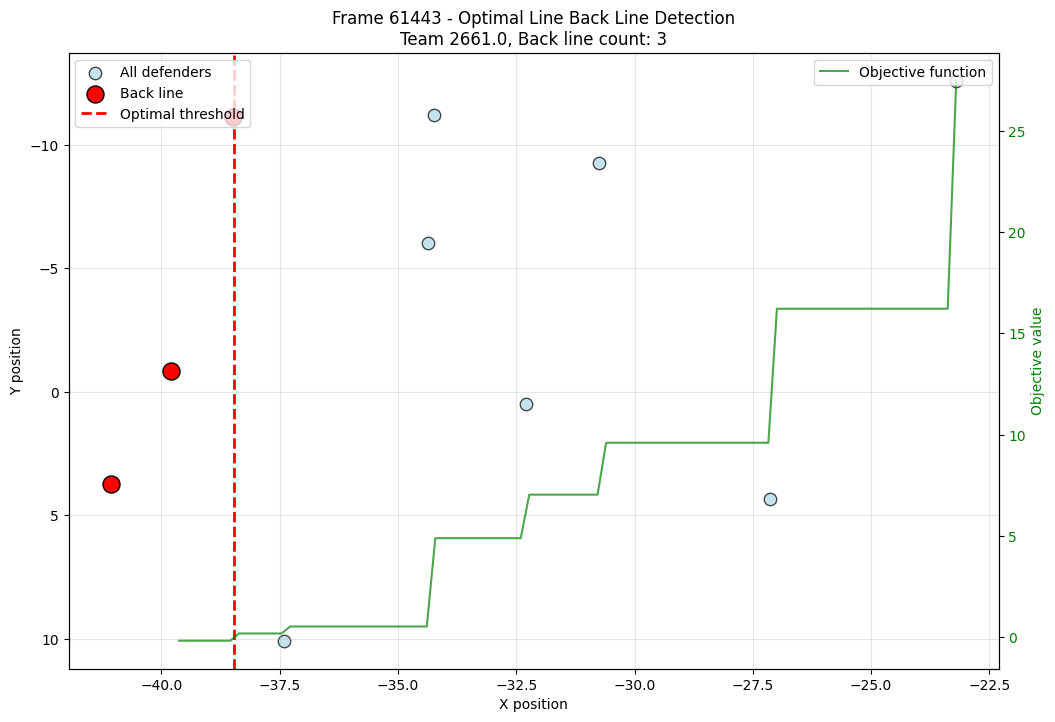

3.0


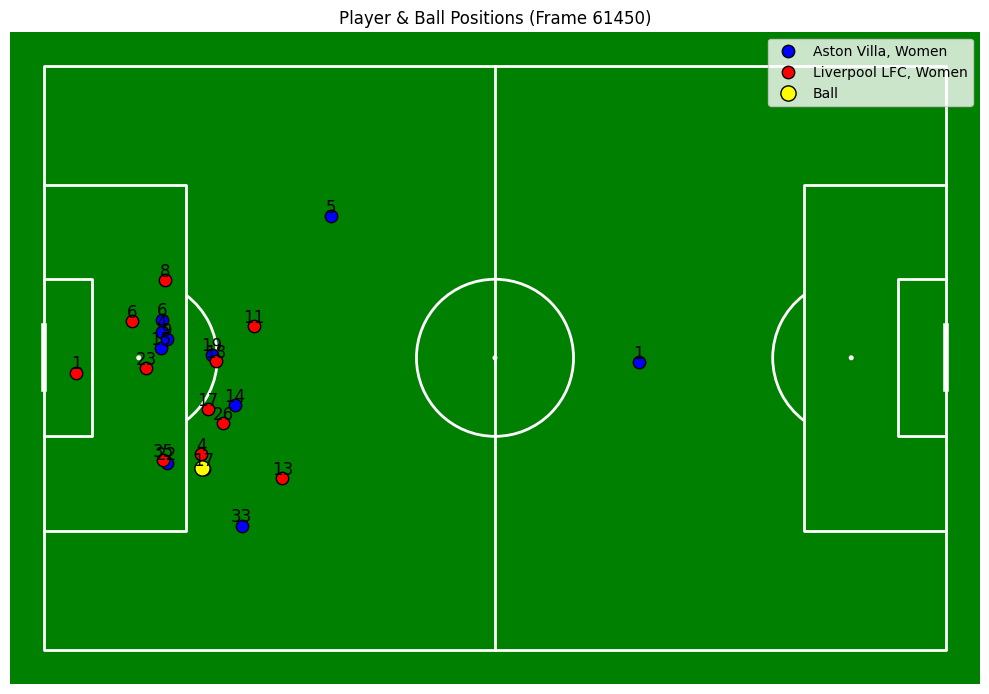

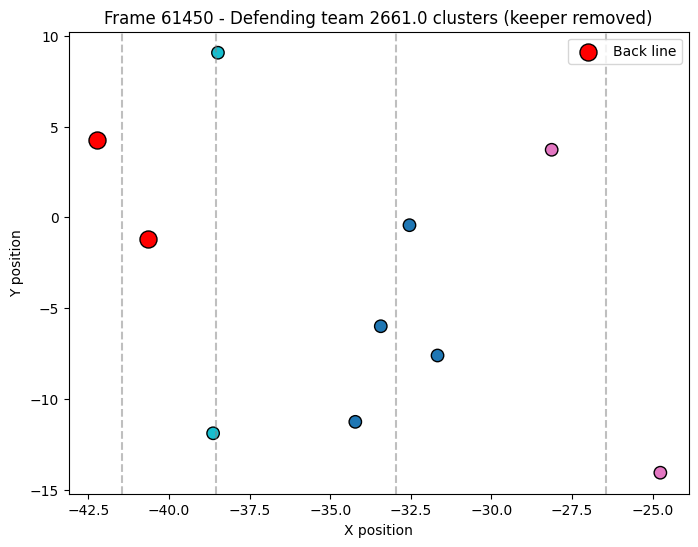

2.0


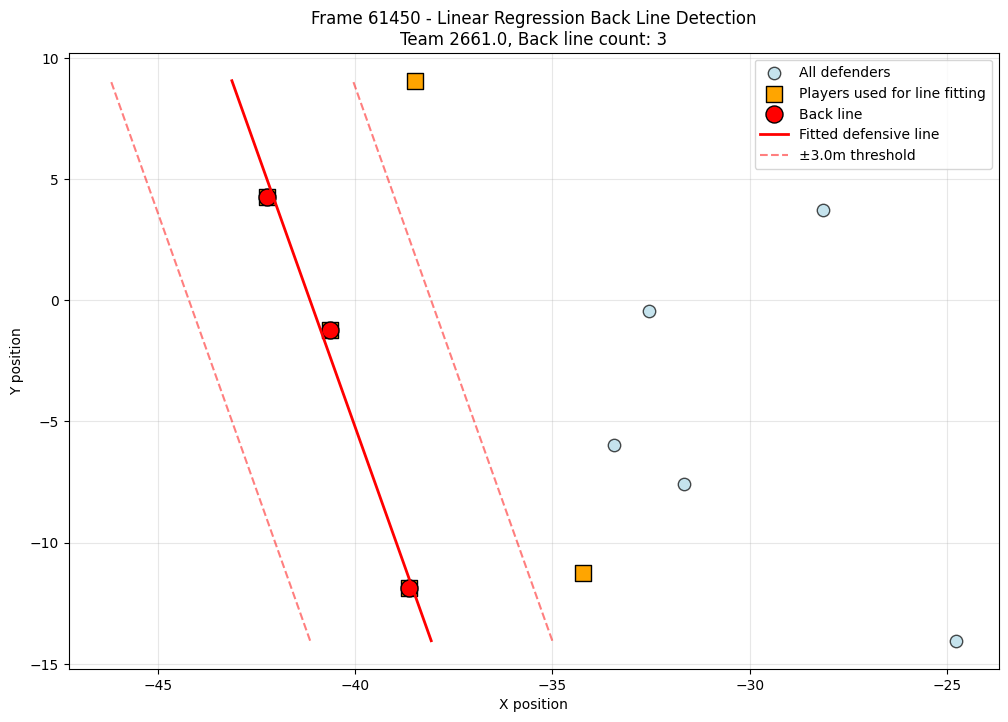

3.0


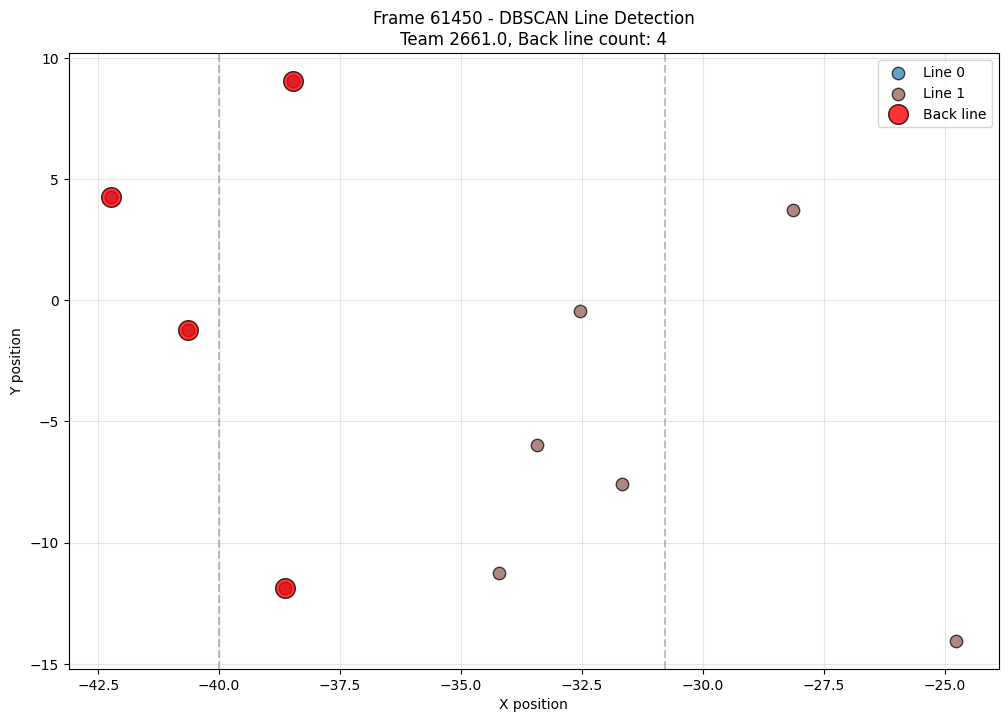

4.0


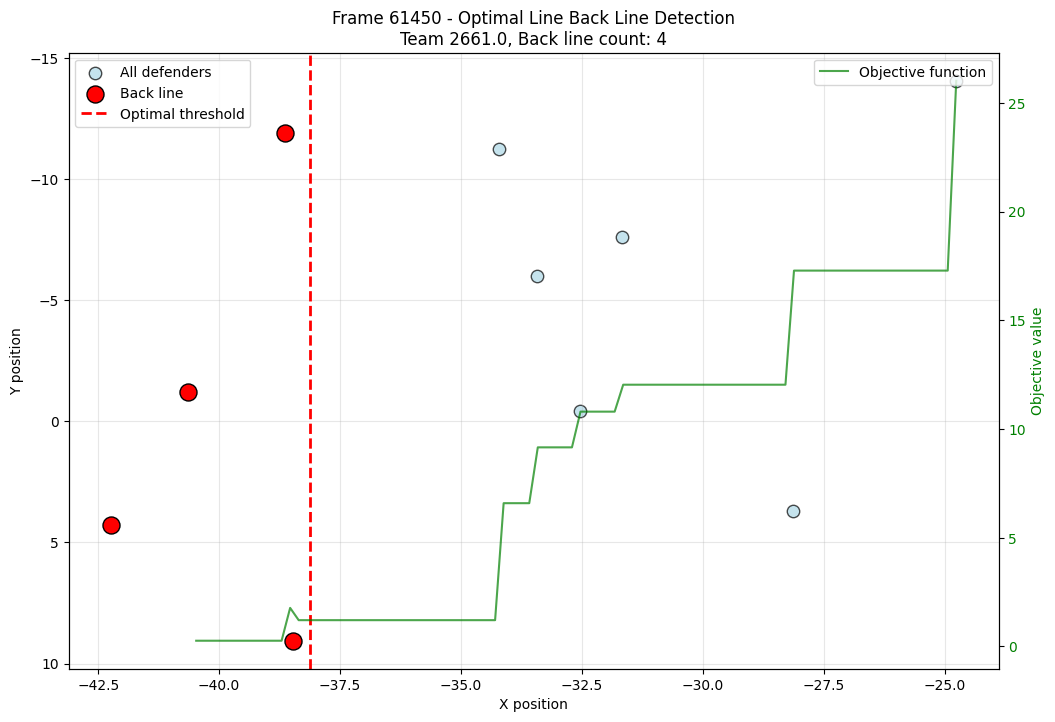

4.0


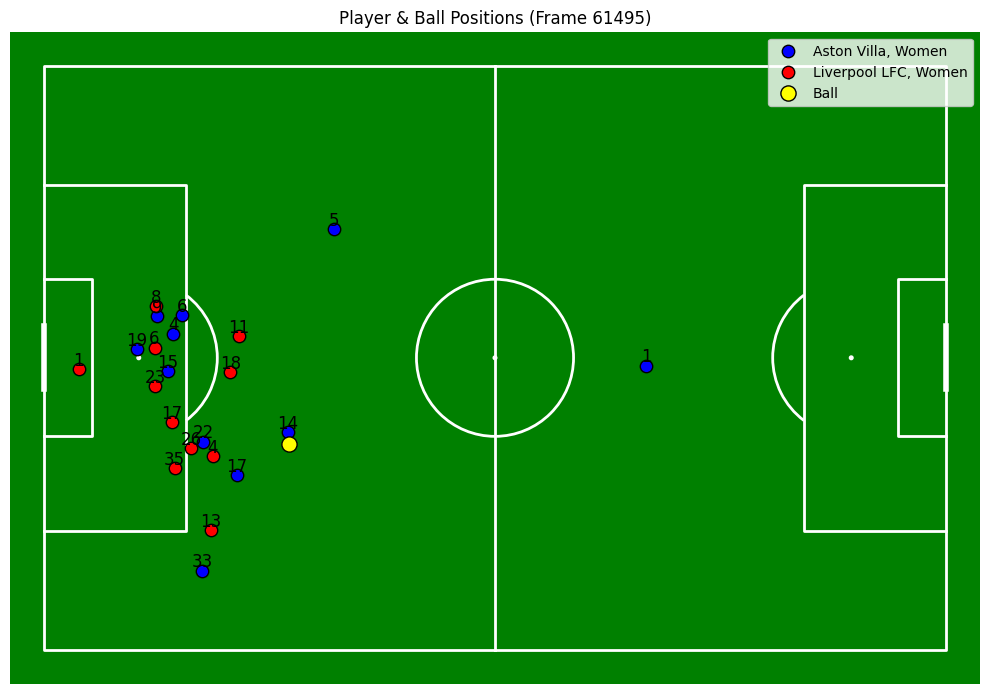

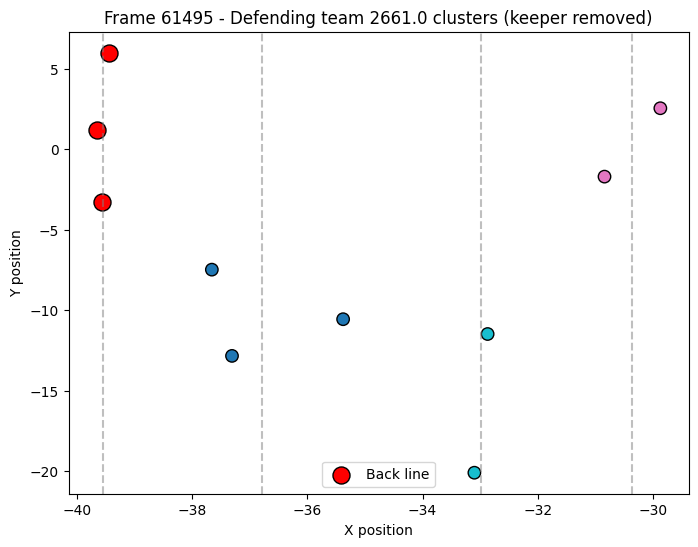

3.0


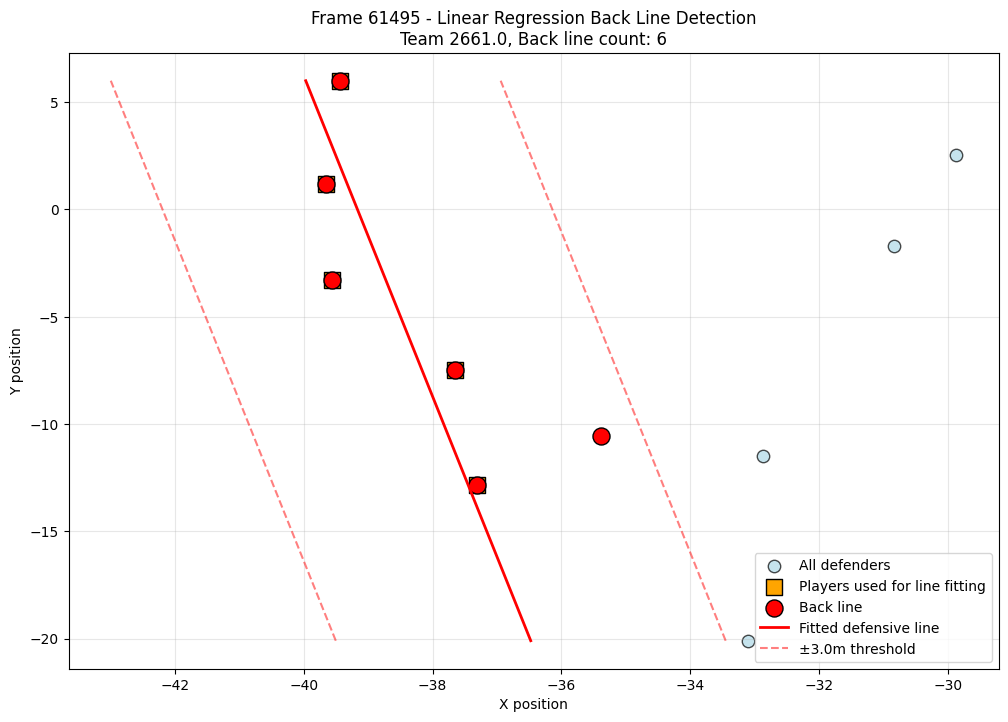

6.0


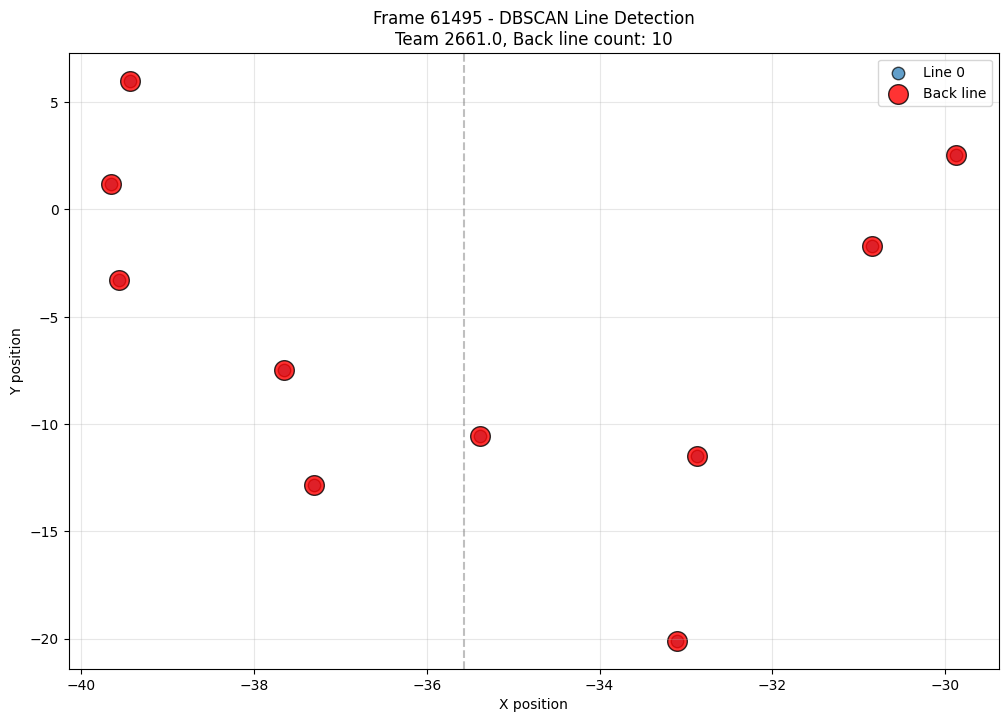

10.0


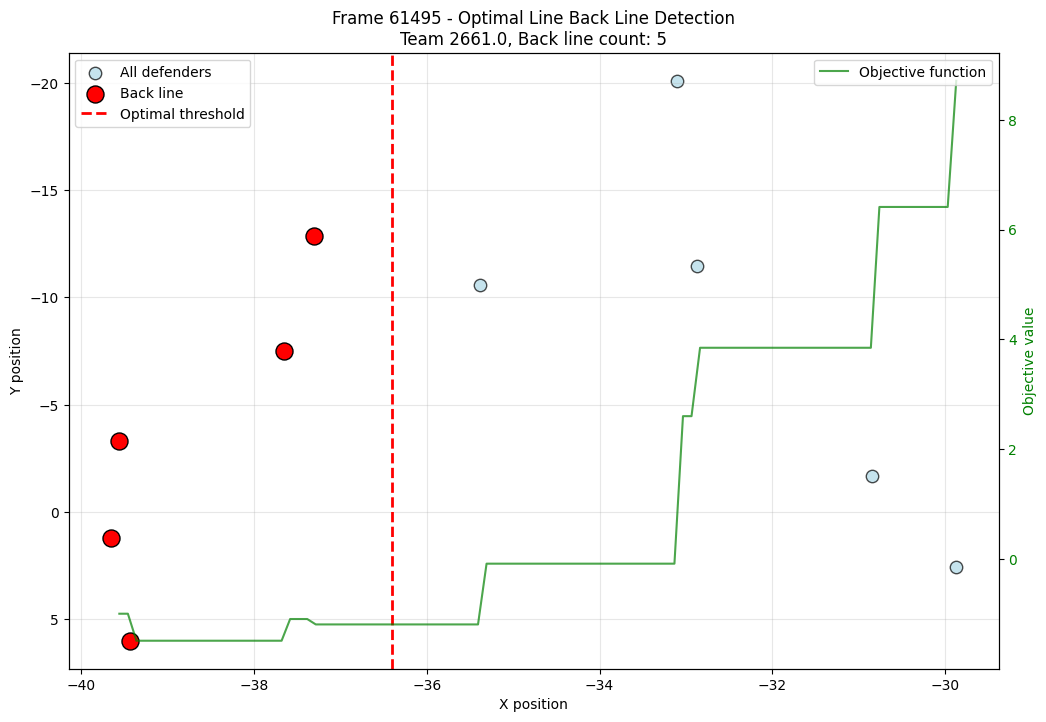

5.0


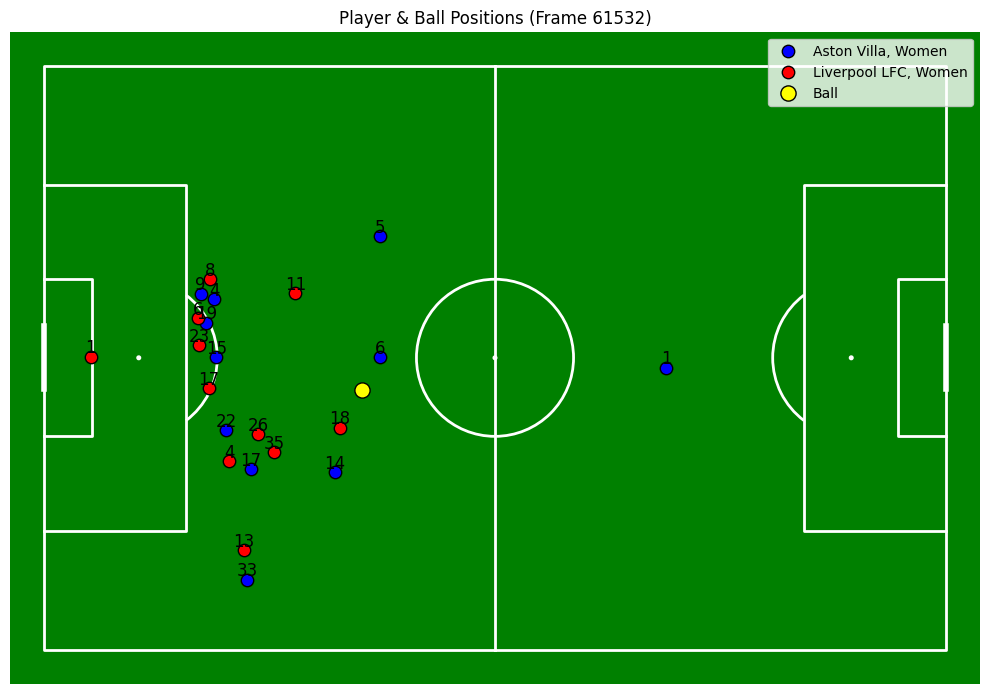

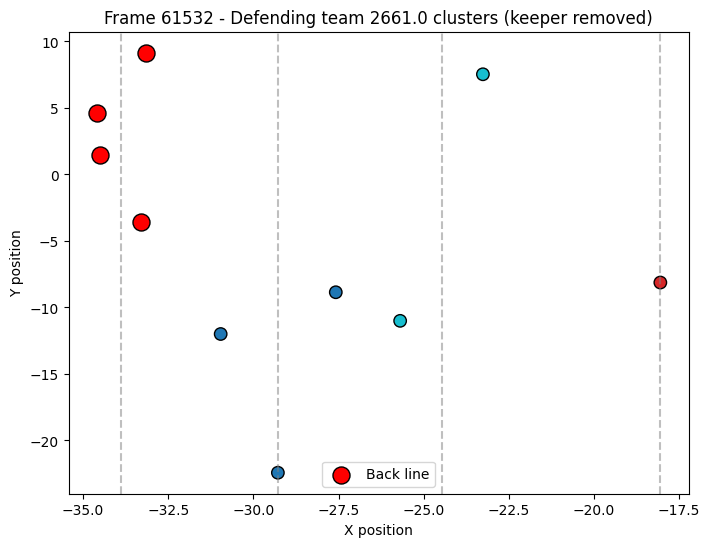

4.0


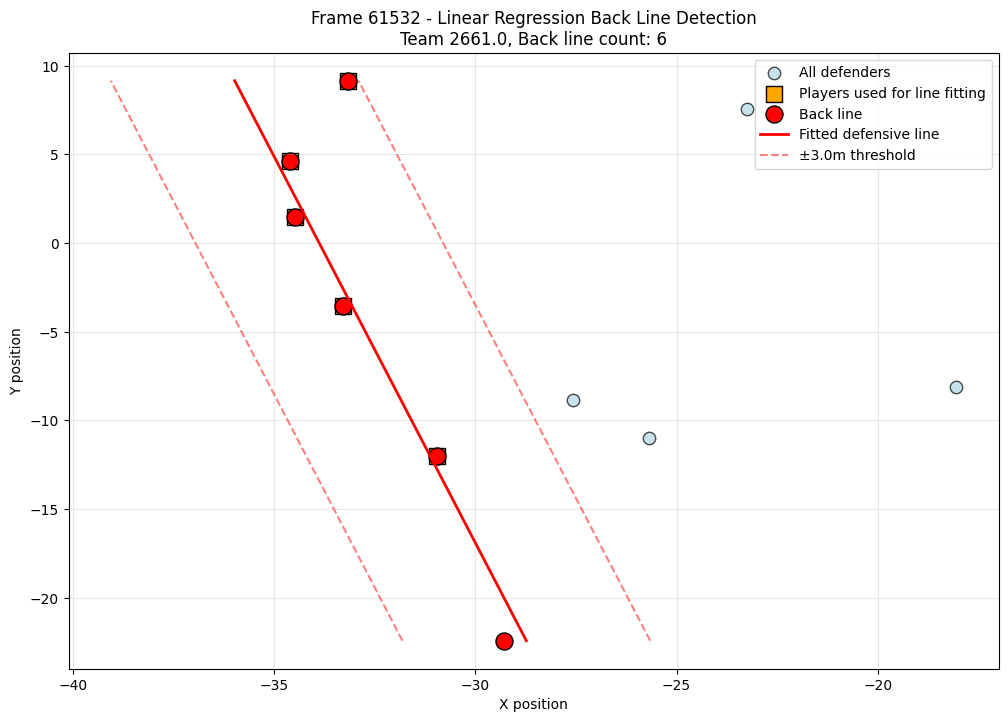

6.0


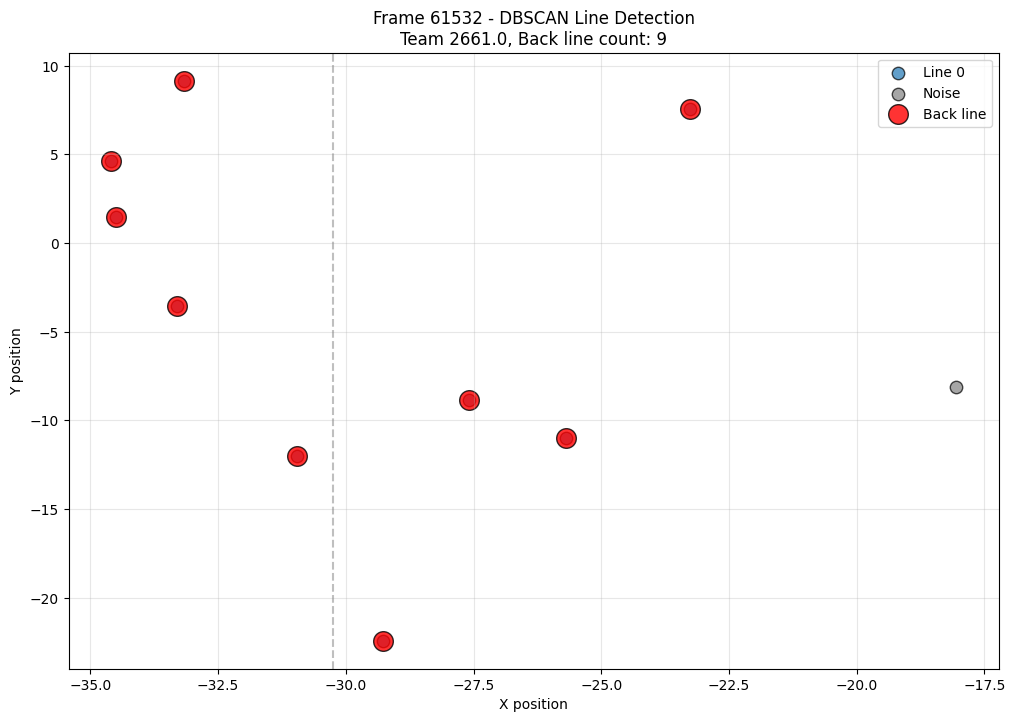

9.0


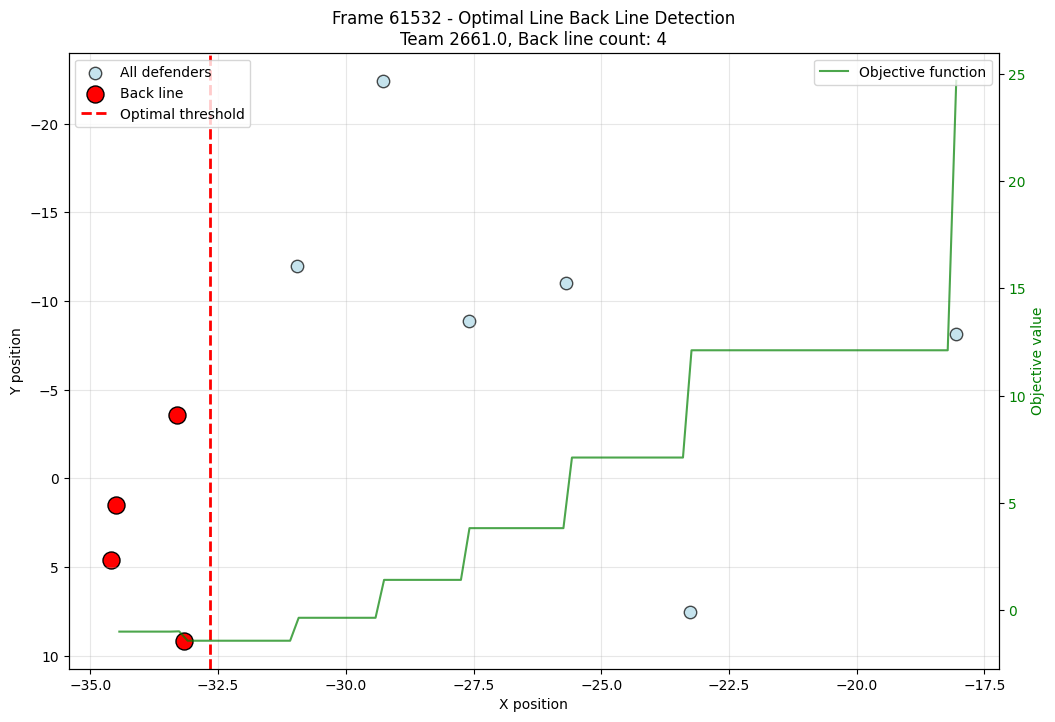

4.0


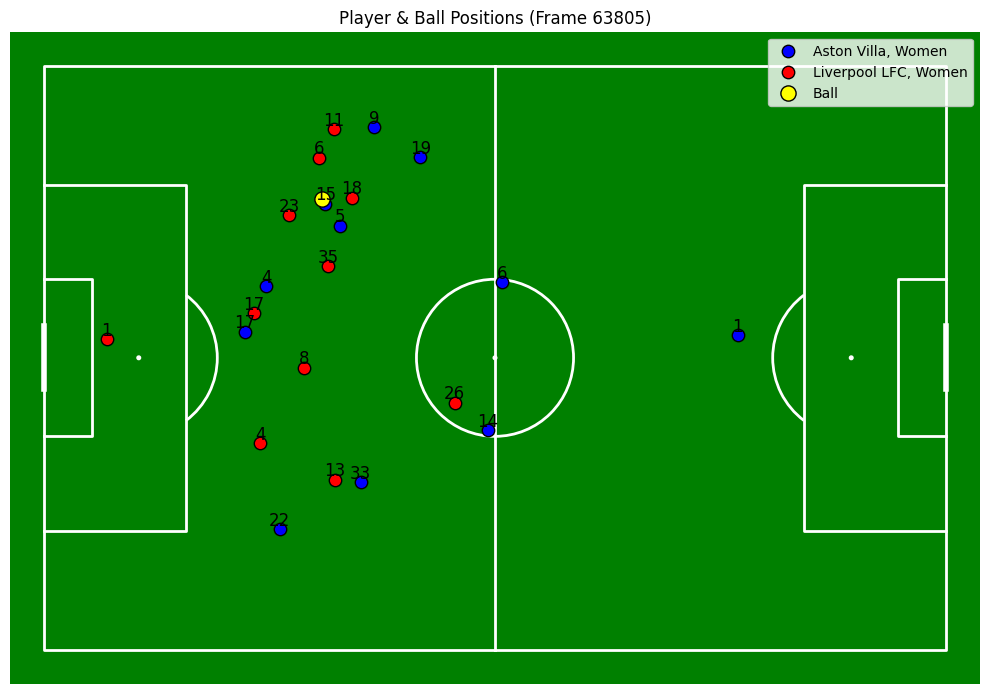

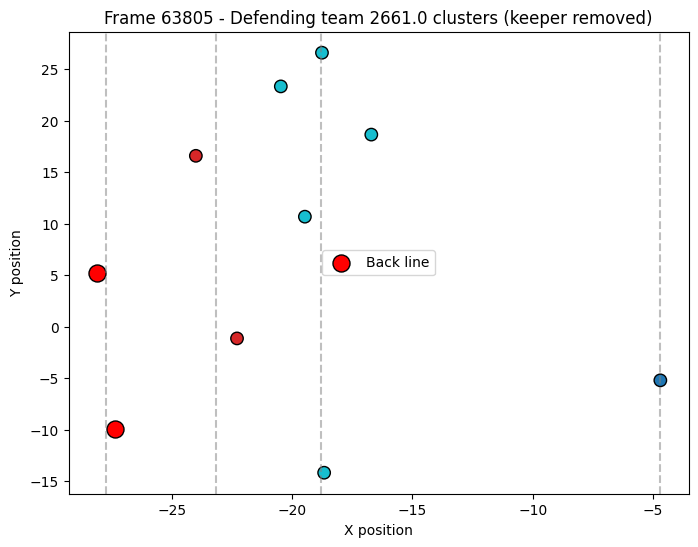

2.0


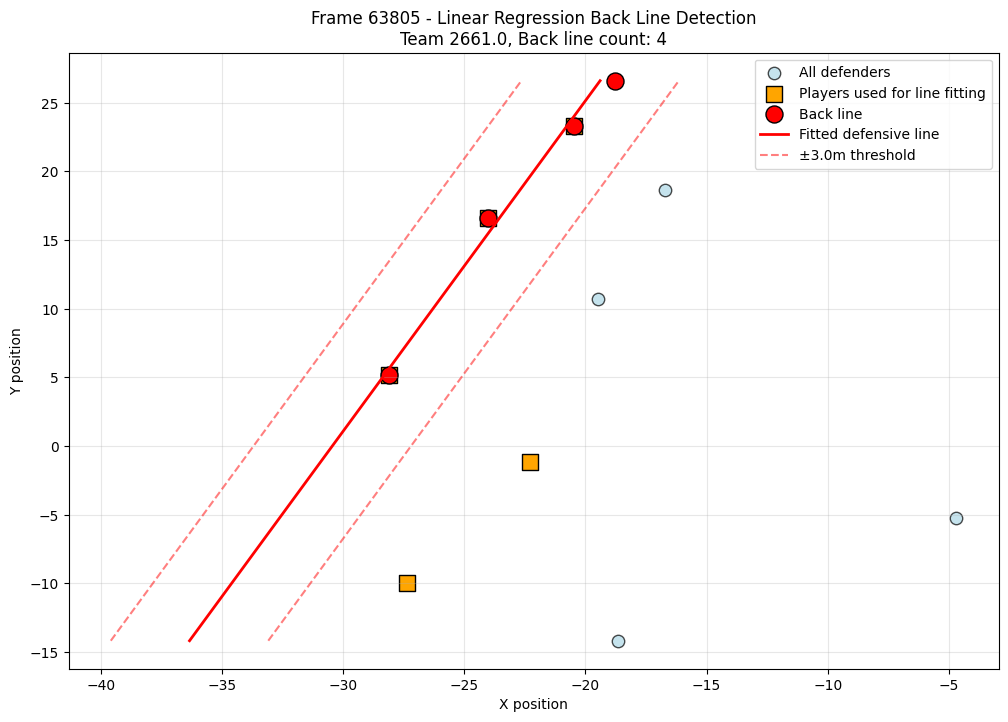

4.0


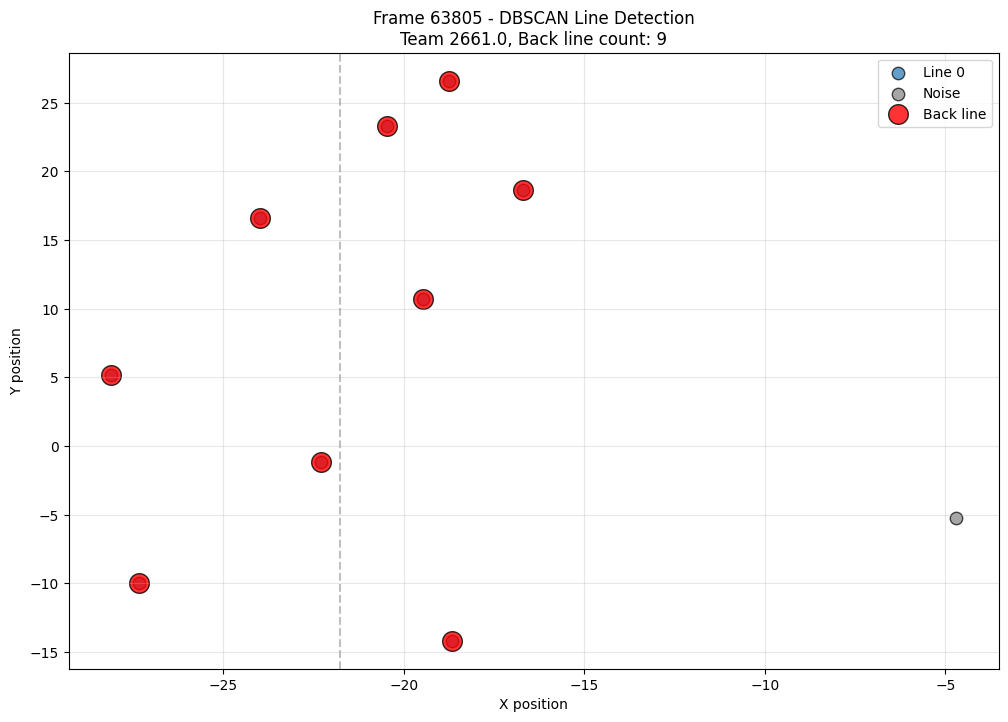

9.0


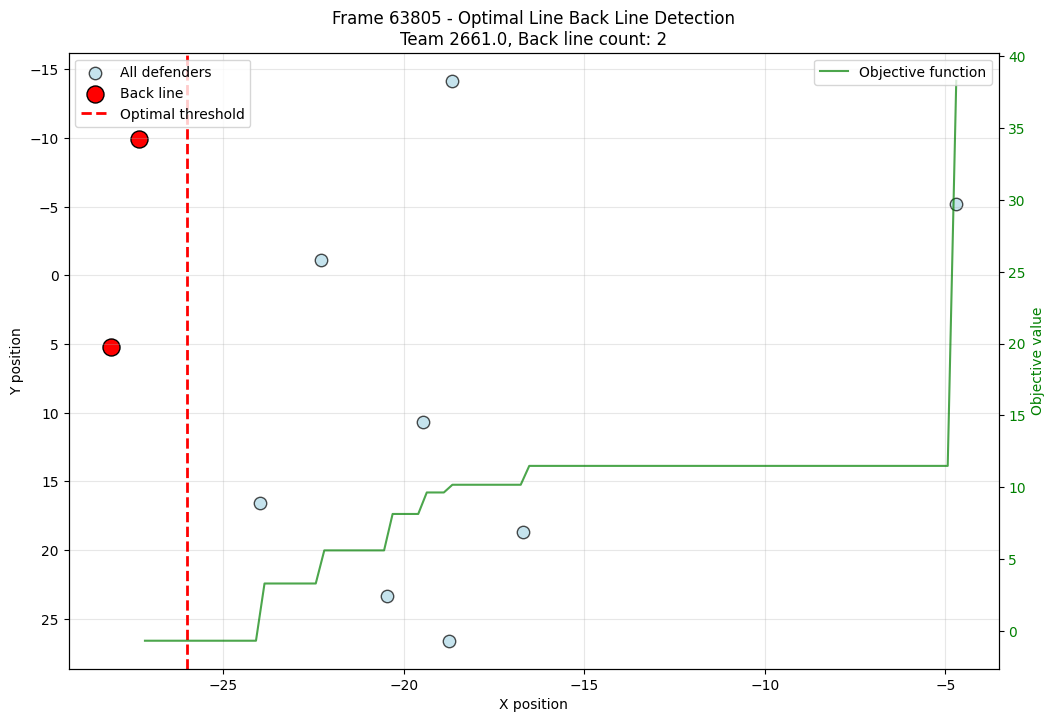

2.0


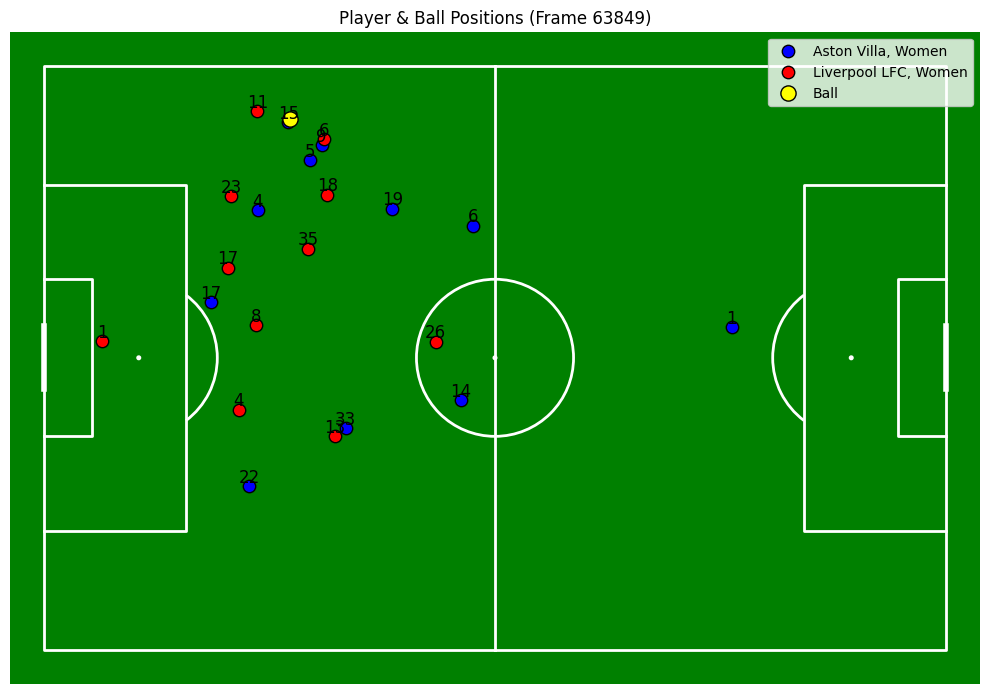

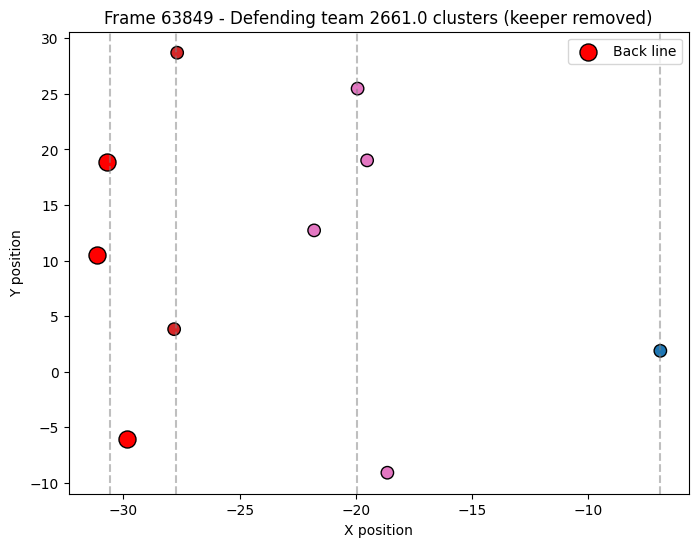

3.0


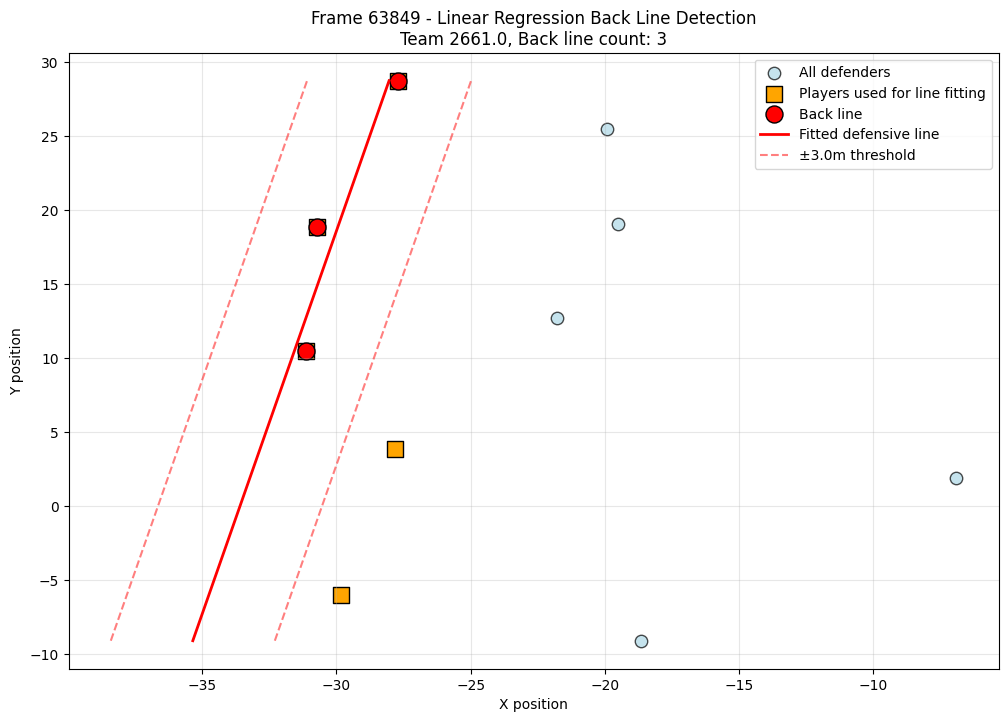

3.0


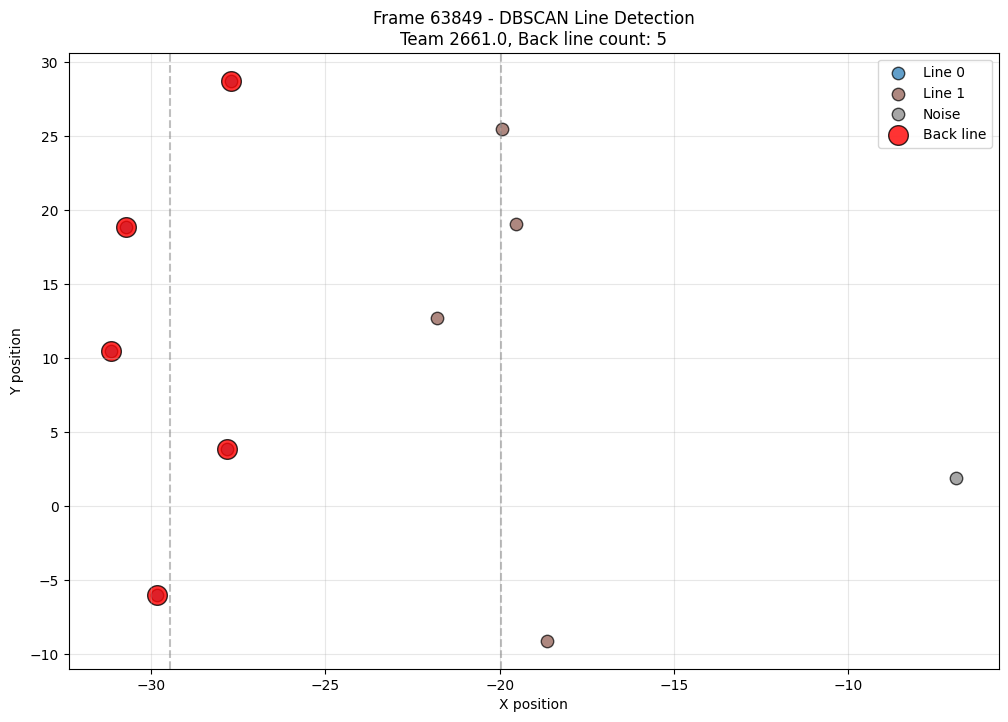

5.0


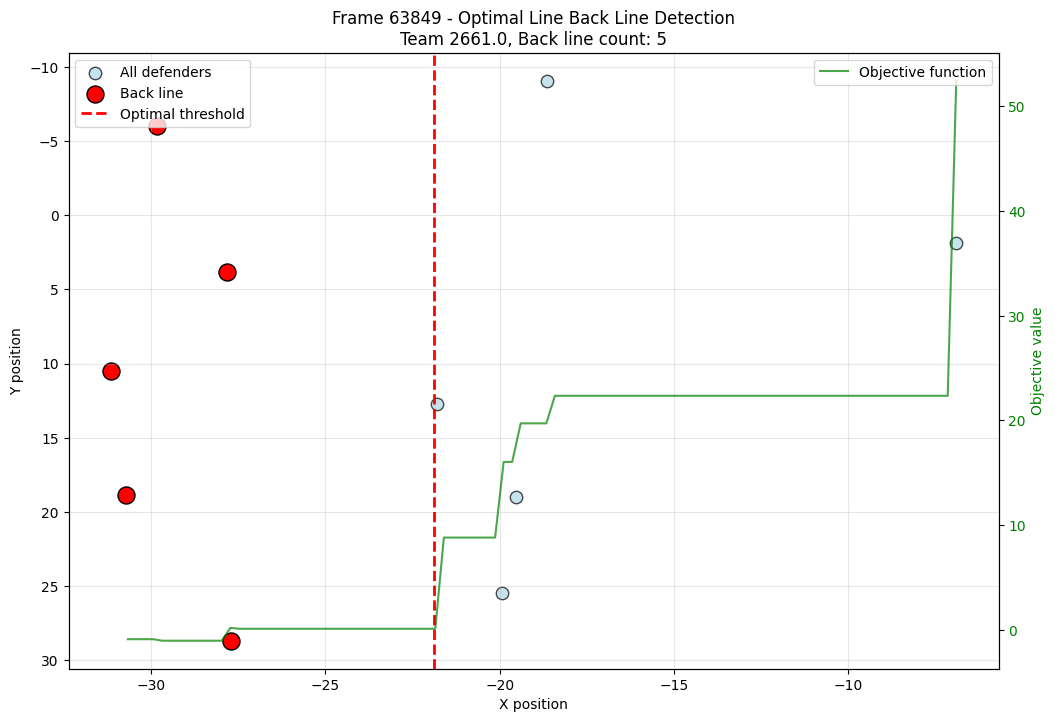

5.0


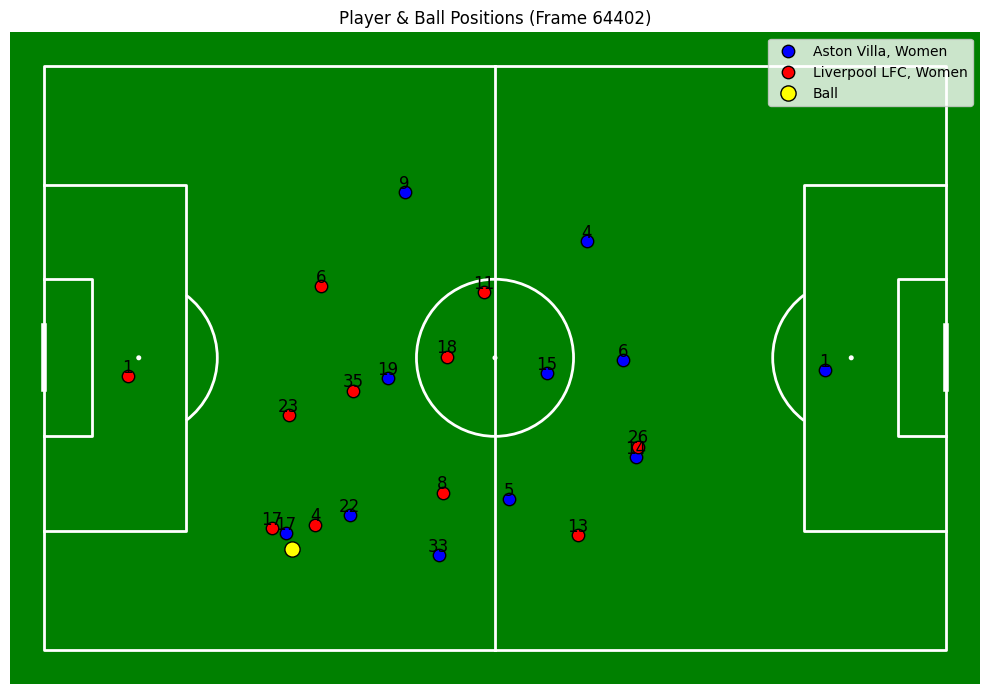

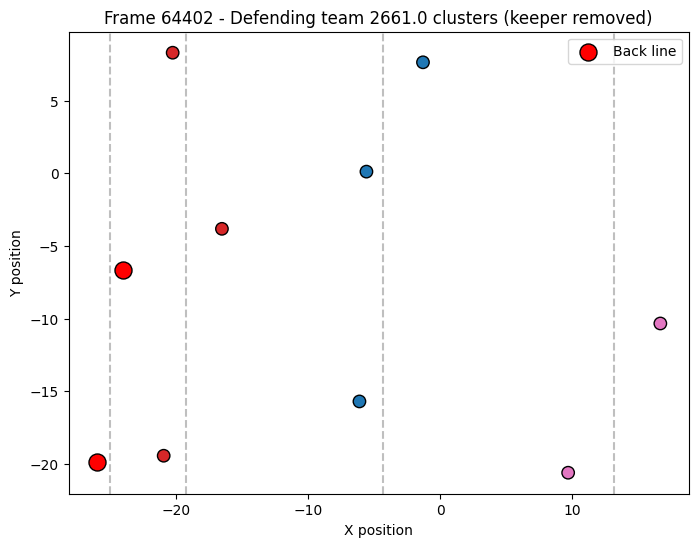

2.0


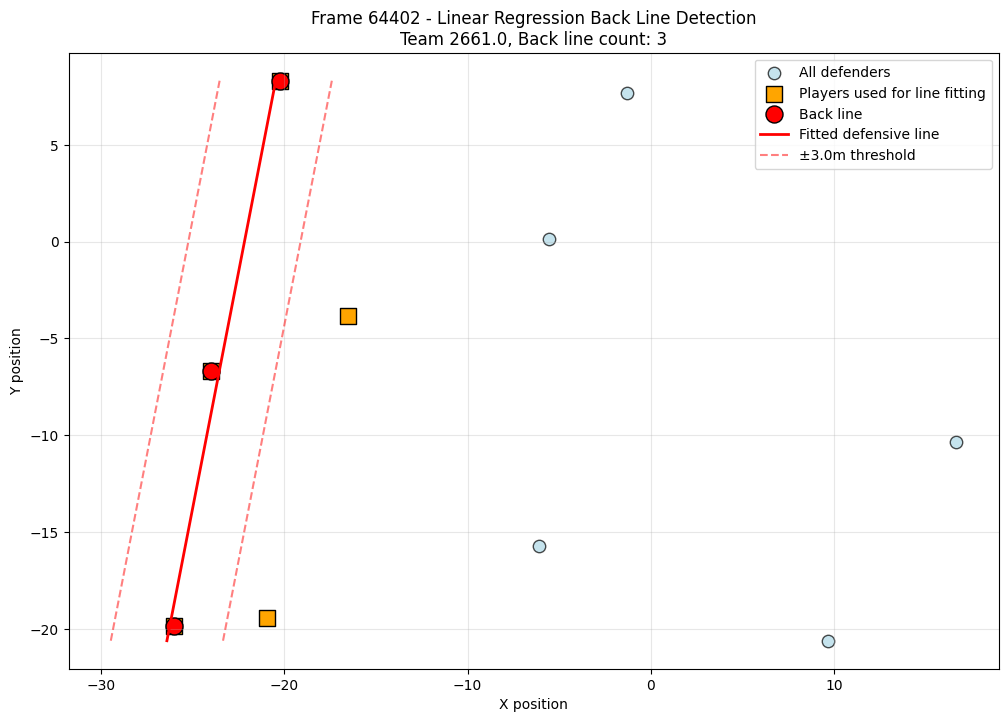

3.0


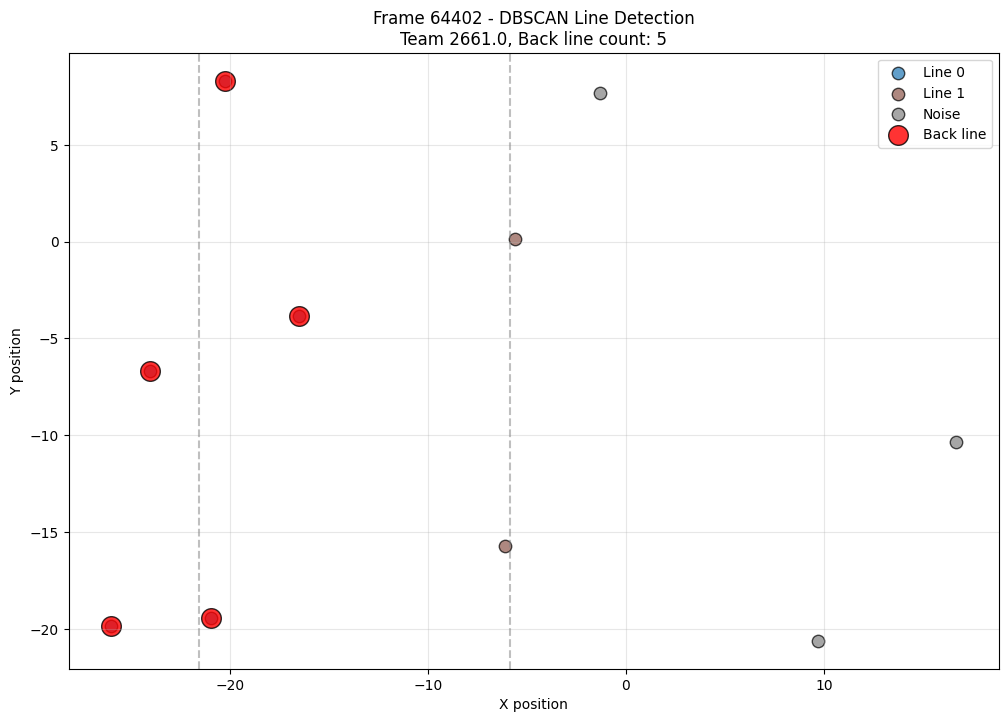

5.0


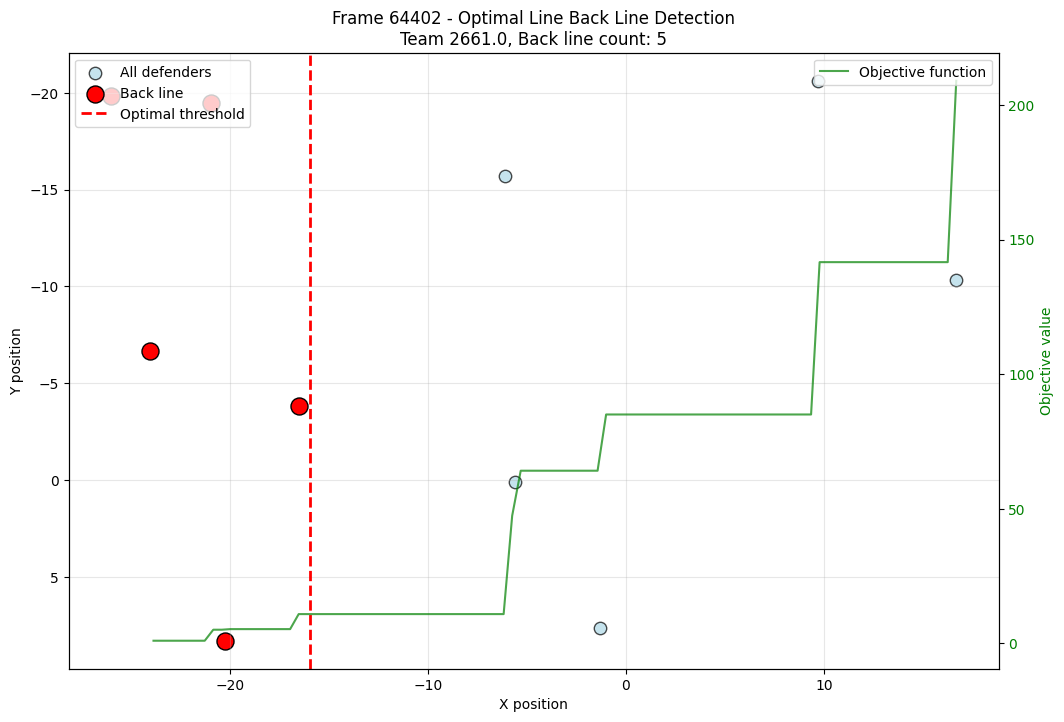

5.0


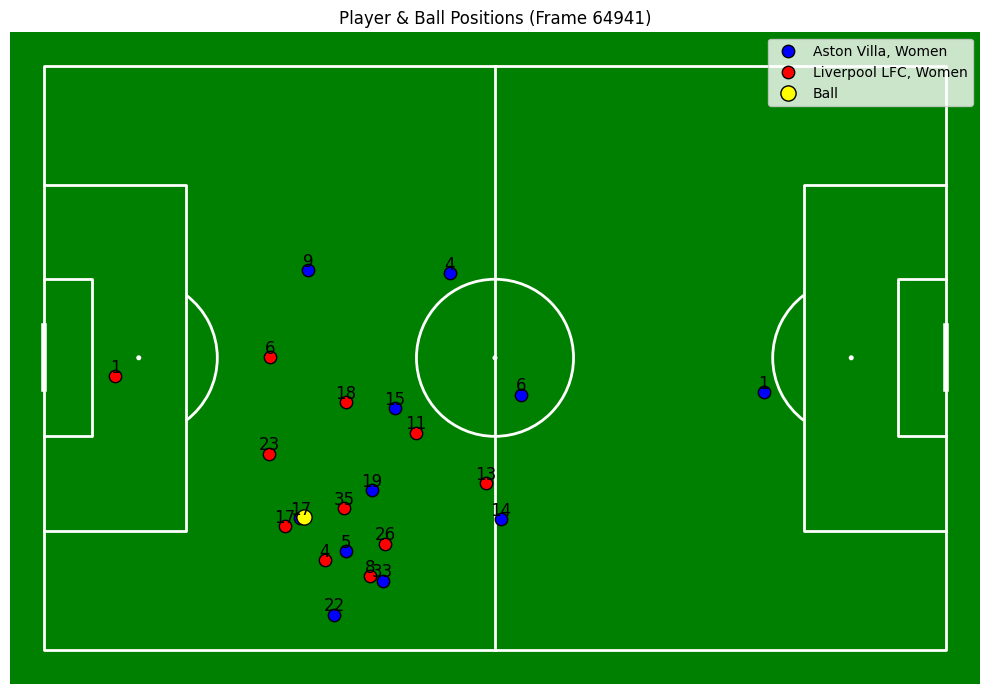

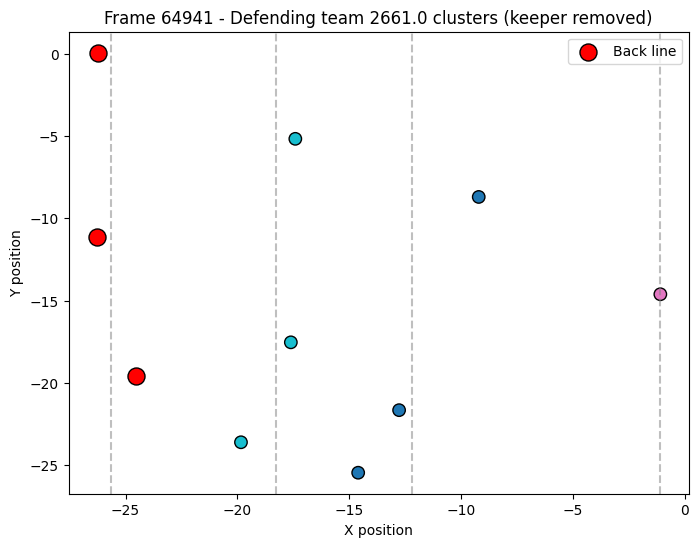

3.0


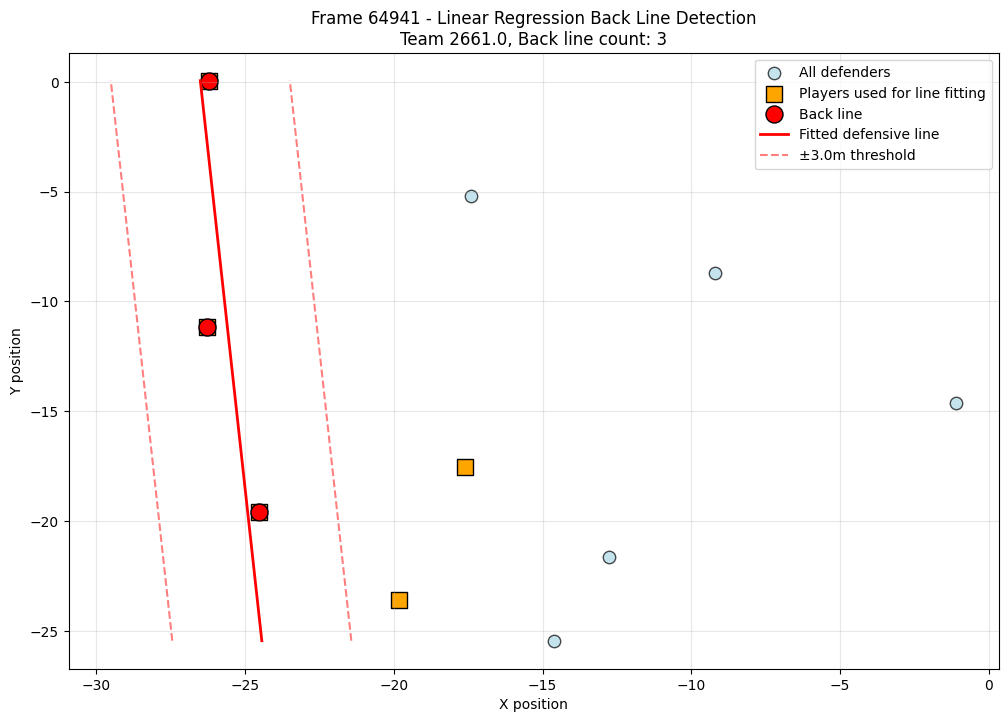

3.0


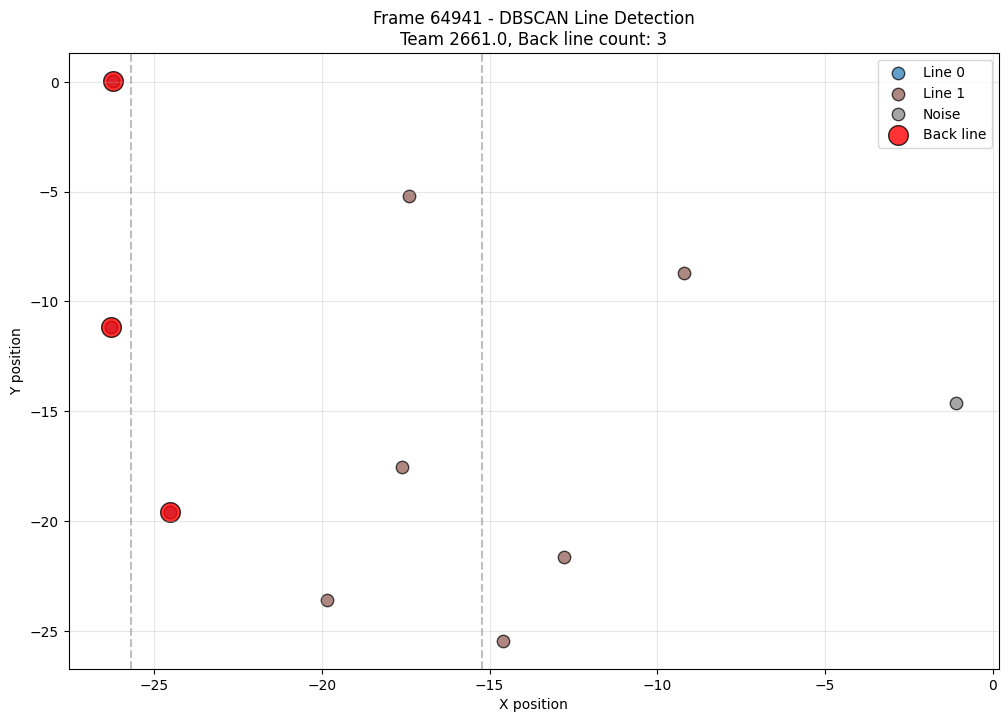

3.0


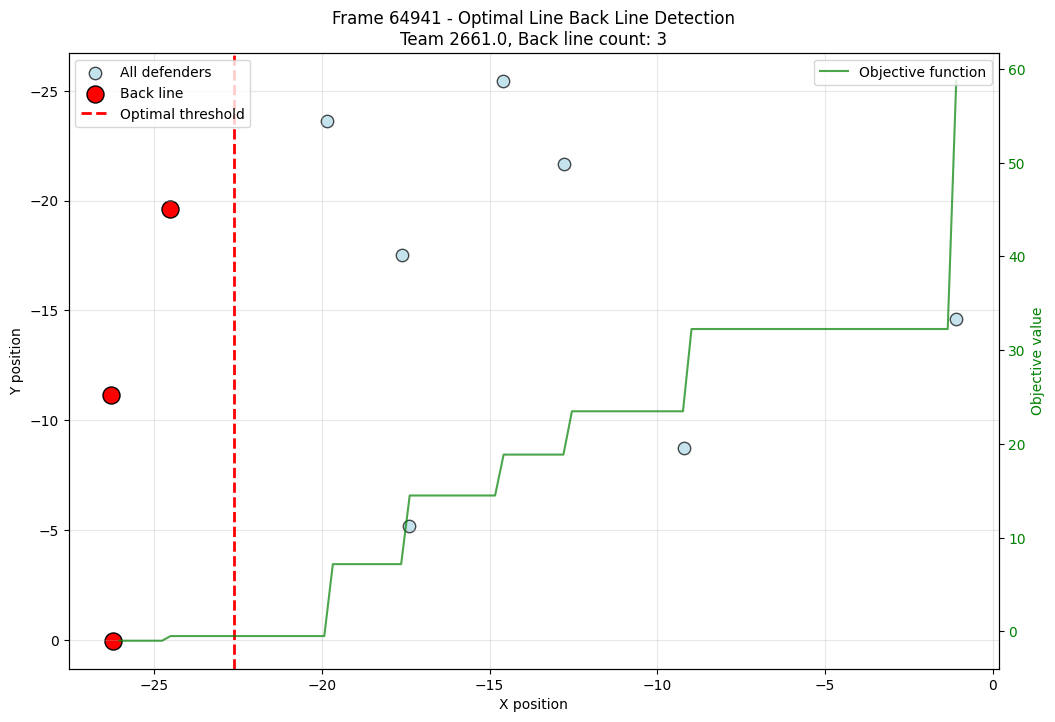

3.0
back_line_count_kmeans
4.0    3
2.0    3
3.0    3
Name: count, dtype: int64
back_line_count_lr
3.0    5
6.0    2
5.0    1
4.0    1
Name: count, dtype: int64
back_line_count_dbscan
9.0     3
10.0    2
5.0     2
4.0     1
3.0     1
Name: count, dtype: int64
back_line_count_optimal
5.0    3
4.0    2
3.0    2
6.0    1
2.0    1
Name: count, dtype: int64


In [30]:
possessions_analysis = poss.copy()
print(f"Possession shape before filter: {possessions_analysis.shape}")
possessions_analysis = filter_attacking_third(possessions_analysis)
print(f"Possession shape before filter: {possessions_analysis.shape}")
possessions_analysis['data_source'] = 'player_possessions'

possessions_analysis['back_line_count'] = possessions_analysis['defensive_structure'].apply(
    extract_back_line_formation
)
matches_df = pd.read_csv('matches.csv')
team_mapping = {}

for _, row in matches_df.iterrows():
    team_mapping[row['home_team_id']] = row['home_team_name']
    team_mapping[row['away_team_id']] = row['away_team_name']

possessions_analysis = possessions_analysis.tail(10)
for i, row in possessions_analysis.iterrows():
    if pd.isna(row['back_line_count']):
        plot_frame_positions_mplsoccer(tracking, row['frame_start'], team_mapping, annotate=True)
        possessions_analysis.at[i,'back_line_count_kmeans'] = count_back_line_defenders_kmeans(tracking, frame_id=row['frame_start'], direction=row['attacking_side'], team_in_possession = row['team_id'], plot=True)
        print(possessions_analysis.at[i,'back_line_count_kmeans'])
        possessions_analysis.at[i,'back_line_count_lr'] = count_back_line_defenders_linear_regression(tracking, frame_id=row['frame_start'], direction=row['attacking_side'], team_in_possession = row['team_id'], plot=True)
        print(possessions_analysis.at[i,'back_line_count_lr'])
        possessions_analysis.at[i,'back_line_count_dbscan'] = count_back_line_defenders_dbscan_lines(tracking, frame_id=row['frame_start'], direction=row['attacking_side'], team_in_possession = row['team_id'], plot=True)
        print(possessions_analysis.at[i,'back_line_count_dbscan'])
        possessions_analysis.at[i,'back_line_count_optimal'] = count_back_line_defenders_optimal_line(tracking, frame_id=row['frame_start'], direction=row['attacking_side'], team_in_possession = row['team_id'], plot=True)
        print(possessions_analysis.at[i,'back_line_count_optimal'])
print(possessions_analysis['back_line_count_kmeans'].value_counts())
print(possessions_analysis['back_line_count_lr'].value_counts())
print(possessions_analysis['back_line_count_dbscan'].value_counts())
print(possessions_analysis['back_line_count_optimal'].value_counts())
